## Проект: Линейные модели в машинном обучении

[yandex practicum link](https://practicum.yandex.ru/learn/data-scientist/courses/de273a30-17f9-476d-8f2f-ff55c7fe17fb/sprints/197573/topics/2fdf9dfb-8a1d-463d-9695-4a95fc16cdcf/lessons/6871f4e2-79b3-4902-975f-f5760c64b759/)

### Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». <font color='red'>Он хочет купить бурёнок, чтобы расширить поголовье стада коров.</font>  Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы <font color='red'>каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. </font> А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать <font color='green'>**две прогнозные модели**</font>  для отбора бурёнок в поголовье:
1) Первая будет прогнозировать возможный удой коровы (<font color='red'>целевой признак Удой</font>);

2) Вторая — рассчитывать вероятность получить вкусное молоко от коровы (<font color='red'>целевой признак Вкус молока</font>).

С помощью модели нужно отобрать коров по двум критериям:
- <font color='red'>средний удой за год — не менее 6000 килограммов;</font>
- <font color='red'>молоко должно быть вкусным.</font>

### Описание данных

Файл ferma_main

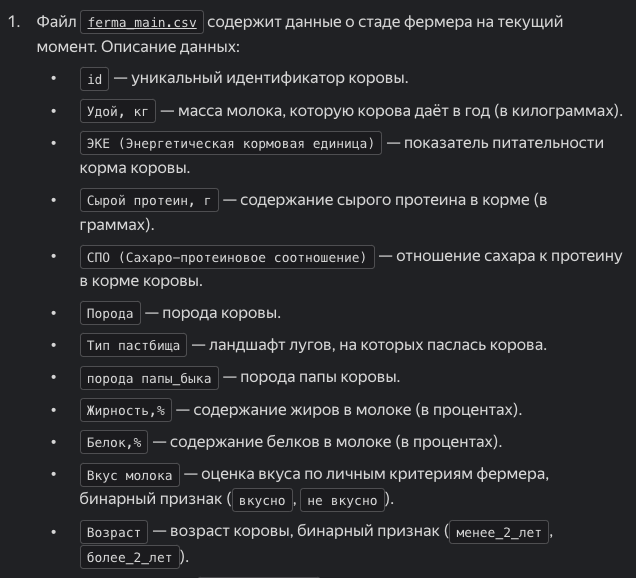

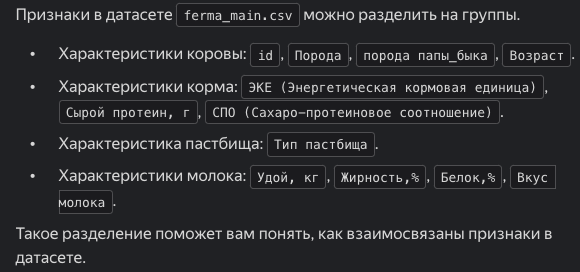

Файлы ferma_dad и cow_buy

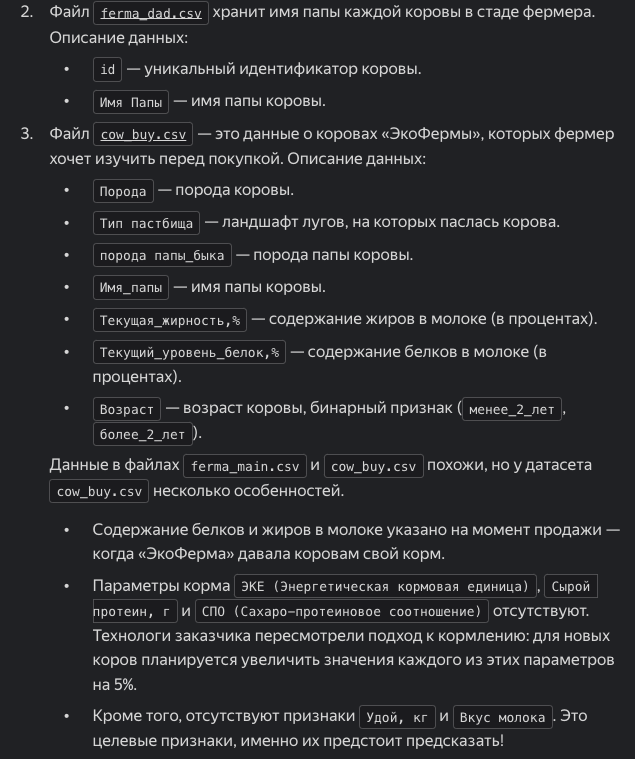

### Шаг 1. Загрузка и изучение данных

In [3]:
# библиотеки для работы с данными
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import random

# бибилотеки для подготовки данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# библиотеки для линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# библиотеки для логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score


In [307]:
# добавим библиотеку для построения scatter диаграмм рассеяния с тренд-линиями
import plotly.express as px 
import plotly.graph_objects as go

In [4]:
try:
    ferma_df = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    ferma_dad_df= pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cow_buy_df = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except FileNotFoundError:
    ferma_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/ferma_main.csv', sep=';')
    ferma_dad_df= pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/ferma_dad.csv', sep=';')
    cow_buy_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/cow_buy.csv', sep=';')

#### Основной датасет по коровам

In [5]:
ferma_df.head()

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет

In [6]:
ferma_df.shape

(634, 12)

In [7]:
ferma_df.id.nunique()

629

Так, строк в датасете 634, а коров - 629. Значит id 5 коров повторяются. Запомнили

Поменяем название столбцов:
- переведем на английский
- устраним пробелы

In [8]:
ferma_df.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [9]:
ferma_df.rename(columns={
                        'Удой, кг':'milk_yield_kg',
                        'ЭКЕ (Энергетическая кормовая единица)':'energy_feed_unity',
                        'Сырой протеин, г': 'crude_protein_g',
                        'СПО (Сахаро-протеиновое соотношение)':'sugar_protein_ratio',
                        'Порода':'cow_breed',
                        'Тип пастбища':'pasture_type',
                        'порода папы_быка':'bull_breed',
                        'Жирность,%': 'milk_fat_percent',
                        'Белок,%' : 'percent_protein_in_milk',
                        'Вкус молока': 'milk_taste',
                        'Возраст':'cow_age'
                    
}, inplace=True)

In [10]:
ferma_df.head()

id  milk_yield_kg energy_feed_unity  crude_protein_g sugar_protein_ratio  \
0   1           5863              14,2             1743                0,89   
1   2           5529              12,8             2138                0,89   
2   3           5810                14             1854               0,885   
3   4           5895              12,4             2012               0,885   
4   5           5302              12,8             1675               0,885   

         cow_breed pasture_type bull_breed milk_fat_percent  \
0   Вис Бик Айдиал    Равнинное     Айдиал             3,58   
1   Вис Бик Айдиал    Равнинные    Соверин             3,54   
2  РефлешнСоверинг    Холмистое    Соверин             3,59   
3  РефлешнСоверинг    Холмистое     Айдиал              3,4   
4   Вис Бик Айдиал    Равнинные    Соверин             3,73   

  percent_protein_in_milk milk_taste      cow_age  
0                   3,076     вкусно  более_2_лет  
1                   3,079     вкусно  менее_2_лет  
2                   3,074  не вкусно  более_2_лет  
3                   3,075  не вкусно  более_2_лет  
4                   3,073     вкусно  менее_2_лет

#### Датасет по связи коров с быками (кто отец коровы)

In [11]:
ferma_dad_df.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [12]:
ferma_dad_df.shape

(629, 2)

Все верно, всего 629 уникальных коров, информация соответствует инфе из основного датасета

Посмотрим, сколько всего уникальных отцов-быков

In [13]:
ferma_dad_df['Имя Папы'].nunique()

4

Всего 4 быка. Посмотрим их имена

In [14]:
ferma_dad_df['Имя Папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Переведем название столбца Имя Папы в удобный вид

In [15]:
ferma_dad_df.rename(columns={'Имя Папы': 'bull_name'}, inplace=True)

In [16]:
ferma_dad_df.head()

id bull_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

#### Датасет о коровах, которых планируют купить

In [17]:
cow_buy_df.head()

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

In [18]:
cow_buy_df.shape

(20, 7)

Переименуем столбцы

In [19]:
cow_buy_df.rename(columns={
                            'Порода': 'cow_breed',
                            'Тип пастбища': 'pasture_type',
                            'порода папы_быка': 'bull_breed',
                            'Имя_папы':'bull_name',
                            'Текущая_жирность,%': 'milk_fat_percent',
                            'Текущий_уровень_белок,%': 'percent_protein_in_milk',
                            'Возраст':'cow_age'

}, inplace=True)

In [20]:
cow_buy_df.head()

cow_breed pasture_type bull_breed bull_name milk_fat_percent  \
0   Вис Бик Айдиал    холмистое     Айдиал  Геркулес             3,58   
1   Вис Бик Айдиал    равнинное    Соверин    Буйный             3,54   
2  РефлешнСоверинг    равнинное    Соверин     Барин             3,59   
3  РефлешнСоверинг    холмистое     Айдиал    Буйный              3,4   
4  РефлешнСоверинг    равнинное     Айдиал    Буйный             3,64   

  percent_protein_in_milk      cow_age  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет

всего 20 коров рассматриватся к приобретению

### Шаг 2. Предобработка данных

#### 2.1 Основной датасет по коровам

- проверить наличие пустых значений
- проверить корректность типов данных
- проверить явные и неявные дубликаты
- трансформировать колонку milk_taste (1 - вкусно, 0 - не вкусно)
- трансформировать колонку cow_age на классы - в зависимости от того, сколько их

##### 2.1.1 Пустые значения

In [21]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       634 non-null    int64 
 1   milk_yield_kg            634 non-null    int64 
 2   energy_feed_unity        634 non-null    object
 3   crude_protein_g          634 non-null    int64 
 4   sugar_protein_ratio      634 non-null    object
 5   cow_breed                634 non-null    object
 6   pasture_type             634 non-null    object
 7   bull_breed               634 non-null    object
 8   milk_fat_percent         634 non-null    object
 9   percent_protein_in_milk  634 non-null    object
 10  milk_taste               634 non-null    object
 11  cow_age                  634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


Пустых значений нет

##### 2.1.2 Корректность типов данных

Столбцы energy_feed_unity,sugar_protein_ratio,milk_fat_percent,percent_protein_in_milk нужно перевести в тип данных float

Причем, сами значения разделены запятой, а должны быть разделены точкой.

Используем функцию и применим к этим столбцам

In [22]:
columns=['energy_feed_unity', 
          'sugar_protein_ratio',
          'milk_fat_percent', 
          'percent_protein_in_milk']

ferma_df[columns] = ferma_df[columns]\
          .apply(lambda x: x.str.replace(',','.').astype('float'))

In [23]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       634 non-null    int64  
 1   milk_yield_kg            634 non-null    int64  
 2   energy_feed_unity        634 non-null    float64
 3   crude_protein_g          634 non-null    int64  
 4   sugar_protein_ratio      634 non-null    float64
 5   cow_breed                634 non-null    object 
 6   pasture_type             634 non-null    object 
 7   bull_breed               634 non-null    object 
 8   milk_fat_percent         634 non-null    float64
 9   percent_protein_in_milk  634 non-null    float64
 10  milk_taste               634 non-null    object 
 11  cow_age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [24]:
ferma_df.head()

id  milk_yield_kg  energy_feed_unity  crude_protein_g  sugar_protein_ratio  \
0   1           5863               14.2             1743                0.890   
1   2           5529               12.8             2138                0.890   
2   3           5810               14.0             1854                0.885   
3   4           5895               12.4             2012                0.885   
4   5           5302               12.8             1675                0.885   

         cow_breed pasture_type bull_breed  milk_fat_percent  \
0   Вис Бик Айдиал    Равнинное     Айдиал              3.58   
1   Вис Бик Айдиал    Равнинные    Соверин              3.54   
2  РефлешнСоверинг    Холмистое    Соверин              3.59   
3  РефлешнСоверинг    Холмистое     Айдиал              3.40   
4   Вис Бик Айдиал    Равнинные    Соверин              3.73   

   percent_protein_in_milk milk_taste      cow_age  
0                    3.076     вкусно  более_2_лет  
1                    3.079     вкусно  менее_2_лет  
2                    3.074  не вкусно  более_2_лет  
3                    3.075  не вкусно  более_2_лет  
4                    3.073     вкусно  менее_2_лет

##### 2.1.3 Явные и неявные дубликаты

In [25]:
ferma_df.duplicated().sum()

5

In [26]:
ferma_df[ferma_df.duplicated()]

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
629  627           5970               14.4             1837   
630  627           5970               14.4             1837   
631  627           5970               14.4             1837   
632  627           5970               14.4             1837   
633  627           5970               14.4             1837   

     sugar_protein_ratio        cow_breed pasture_type bull_breed  \
629                 0.88  РефлешнСоверинг    Холмистое    Соверин   
630                 0.88  РефлешнСоверинг    Холмистое    Соверин   
631                 0.88  РефлешнСоверинг    Холмистое    Соверин   
632                 0.88  РефлешнСоверинг    Холмистое    Соверин   
633                 0.88  РефлешнСоверинг    Холмистое    Соверин   

     milk_fat_percent  percent_protein_in_milk milk_taste      cow_age  
629              3.64                    3.075  не вкусно  более_2_лет  
630              3.64                    3.075  не вкусно  более_2_лет  
631              3.64                    3.075  не вкусно  более_2_лет  
632              3.64                    3.075  не вкусно  более_2_лет  
633              3.64                    3.075  не вкусно  более_2_лет

In [27]:
ferma_df.drop_duplicates(inplace=True)

In [28]:
ferma_df.duplicated().sum()

0

Избавились от явных дубликатов

In [29]:
ferma_df.id.nunique()


629

В датасете осталось 629 коров с уникальным id. Это означает, что каждая корова уникальна. Даже если некоторые данные у разных коров совпадают.

неявных дубликатов быть не может

##### 2.1.4 Трансформация колонки milk_taste

In [30]:
ferma_df.milk_taste.unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [31]:
ferma_df.milk_taste = ferma_df.milk_taste.apply(lambda x: 1 if x=='вкусно' else 0)

заодно уточним название столбца

In [32]:
ferma_df.rename(columns={'milk_taste':'is_tasty'}, inplace=True)

In [33]:
ferma_df.sample(5)

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
101  102           6013               15.7             1755   
529  530           6642               15.7             1984   
578  579           5235               12.2             1724   
217  218           6559               14.7             1796   
372  373           6600               15.6             1971   

     sugar_protein_ratio        cow_breed pasture_type bull_breed  \
101                 0.93   Вис Бик Айдиал    Холмистое    Соверин   
529                 0.94   Вис Бик Айдиал    Равнинное     Айдиал   
578                 0.86  РефлешнСоверинг    Холмистое    Соверин   
217                 0.93   Вис Бик Айдиал    Холмистое     Айдиал   
372                 0.94   Вис Бик Айдиал    Равнинное     Айдиал   

     milk_fat_percent  percent_protein_in_milk  is_tasty      cow_age  
101              3.71                    3.074         1  более_2_лет  
529              3.72                    3.072         1  более_2_лет  
578              3.28                    3.078         0  менее_2_лет  
217              3.71                    3.073         0  более_2_лет  
372              3.73                    3.076         1  более_2_лет

##### 2.1.5 Трансформация колонки cow_age

In [34]:
ferma_df.cow_age.unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

классов "Возраст" всего два. Заменим их на бинарную классификацию: старше 2 лет = 1, младше = 0

Причем будем считать молодой коровой - до двух лет, старой - более двух лет (для имени столбца)

In [35]:
ferma_df.cow_age = ferma_df.cow_age.apply(lambda x: 1 if x=='более_2_лет' else 0)

In [36]:
ferma_df.rename(columns={'cow_age':'is_old'}, inplace=True)

In [37]:
ferma_df.sample(5)

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
38    39           5702               13.3             1745   
229  230           5877               12.5             1926   
478  479           5882               12.8             1746   
359  360           5529               13.4             1733   
58    59           6274               14.8             2264   

     sugar_protein_ratio        cow_breed pasture_type bull_breed  \
38                 0.895   Вис Бик Айдиал    Равнинные    Айдиалл   
229                0.890   Вис Бик Айдиал    Холмистое     Айдиал   
478                0.850   Вис Бик Айдиал    Равнинное    Соверин   
359                0.890  РефлешнСоверинг    Холмистое    Соверин   
58                 0.930   Вис Бик Айдиал    Холмистое    Айдиалл   

     milk_fat_percent  percent_protein_in_milk  is_tasty  is_old  
38               3.49                    3.075         0       1  
229              3.27                    3.078         1       1  
478              3.41                    3.077         0       1  
359              3.34                    3.072         0       0  
58               3.53                    3.081         1       1

In [38]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       629 non-null    int64  
 1   milk_yield_kg            629 non-null    int64  
 2   energy_feed_unity        629 non-null    float64
 3   crude_protein_g          629 non-null    int64  
 4   sugar_protein_ratio      629 non-null    float64
 5   cow_breed                629 non-null    object 
 6   pasture_type             629 non-null    object 
 7   bull_breed               629 non-null    object 
 8   milk_fat_percent         629 non-null    float64
 9   percent_protein_in_milk  629 non-null    float64
 10  is_tasty                 629 non-null    int64  
 11  is_old                   629 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 63.9+ KB


##### 2.1.6 Выводы 

- пустых значений нет
- дубликаты убрали
- типы данных исправили
- столбцы вкус молока (1-вкусно, 0 - невкусно) и возраст коровы (1-старше 2 лет, 0 - младше) привели в бинарный вид

#### 2.2 Предобработка датасета по быкам

In [39]:
ferma_dad_df.head()

id bull_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

Повторы быков будут - их всего 4 шт на ферме. каждой корове (их 629) соответствует свой папа-бык.

предобработки не требуется

#### 2.3 Предобработка датасета по покупным коровам

Помним, что их 20 шт, посмотрим на весь датасет

Еще раз запомним тот факт, что данные в столбцах milk_fat_percent и percent_protein_in_milk - Содержание белков и жиров в молоке указаны на момент продажи — <font color='red'>когда «ЭкоФерма» давала коровам свой корм.</font> 

In [40]:
cow_buy_df

cow_breed pasture_type bull_breed bull_name milk_fat_percent  \
0    Вис Бик Айдиал    холмистое     Айдиал  Геркулес             3,58   
1    Вис Бик Айдиал    равнинное    Соверин    Буйный             3,54   
2   РефлешнСоверинг    равнинное    Соверин     Барин             3,59   
3   РефлешнСоверинг    холмистое     Айдиал    Буйный              3,4   
4   РефлешнСоверинг    равнинное     Айдиал    Буйный             3,64   
5   РефлешнСоверинг    равнинное    Соверин  Геркулес             3,63   
6    Вис Бик Айдиал    холмистое     Айдиал  Геркулес             3,58   
7    Вис Бик Айдиал    равнинное    Соверин    Буйный             3,57   
8   РефлешнСоверинг    равнинное    Соверин     Барин             3,59   
9   РефлешнСоверинг    холмистое     Айдиал    Буйный              3,4   
10   Вис Бик Айдиал    холмистое    Соверин  Соловчик             3,73   
11  РефлешнСоверинг    равнинное    Соверин  Геркулес             3,73   
12   Вис Бик Айдиал    холмистое     Айдиал  Геркулес             3,68   
13   Вис Бик Айдиал    холмистое    Соверин     Барин             3,42   
14  РефлешнСоверинг    равнинное    Соверин     Барин             3,59   
15  РефлешнСоверинг    холмистое     Айдиал    Буйный              3,4   
16   Вис Бик Айдиал    холмистое    Соверин  Соловчик             3,73   
17  РефлешнСоверинг    равнинное    Соверин  Геркулес             3,77   
18   Вис Бик Айдиал    равнинное    Соверин    Буйный             3,34   
19  РефлешнСоверинг    равнинное     Айдиал    Буйный             3,64   

   percent_protein_in_milk      cow_age  
0                    3,076  более_2_лет  
1                    3,081  менее_2_лет  
2                    3,074  более_2_лет  
3                    3,061  более_2_лет  
4                    3,074  более_2_лет  
5                    3,053  менее_2_лет  
6                    3,076  более_2_лет  
7                    3,079  более_2_лет  
8                    3,074  более_2_лет  
9                    3,079  менее_2_лет  
10                   3,055  более_2_лет  
11                   3,073  более_2_лет  
12                   3,046  более_2_лет  
13                   3,075  менее_2_лет  
14                   3,074  более_2_лет  
15                   3,065  более_2_лет  
16                   3,079  более_2_лет  
17                   3,053  менее_2_лет  
18                   3,069  более_2_лет  
19                   3,074  более_2_лет

Кстати, примечательно, что порода папы-быка отнюдь не является определяющим породы коровы. Породы папы и дитя могут отличаться.

и еще одна особенность данных: порода быка определена одним словом, а порода коровы - несколькими.

Например, порода быка "Соверин", а коровы "РефлешнСоверинг"

Возможно, потребуется привести данные в один формат

In [41]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cow_breed                20 non-null     object
 1   pasture_type             20 non-null     object
 2   bull_breed               20 non-null     object
 3   bull_name                20 non-null     object
 4   milk_fat_percent         20 non-null     object
 5   percent_protein_in_milk  20 non-null     object
 6   cow_age                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


А так, "проблемы" в общем-то те же:

- посмотреть пустые значения - их нет
- заменить типы данных для столбцов milk_fat_percent и percent_protein_in_milk на float 
- посмотреть дубликаты
- трансформировать столбец cow_age

In [42]:
cow_buy_df[['milk_fat_percent', 'percent_protein_in_milk']] =  cow_buy_df[['milk_fat_percent', 'percent_protein_in_milk']]\
    .apply(lambda x: x.str.replace(',','.').astype('float'))

In [43]:
cow_buy_df.duplicated().sum()

4

In [44]:
cow_buy_df[cow_buy_df.duplicated()]

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
6    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
8   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
14  РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
19  РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   

    percent_protein_in_milk      cow_age  
6                     3.076  более_2_лет  
8                     3.074  более_2_лет  
14                    3.074  более_2_лет  
19                    3.074  более_2_лет

In [45]:
cow_buy_df

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
0    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
1    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.54   
2   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
3   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
4   РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   
5   РефлешнСоверинг    равнинное    Соверин  Геркулес              3.63   
6    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
7    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.57   
8   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
9   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
10   Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
11  РефлешнСоверинг    равнинное    Соверин  Геркулес              3.73   
12   Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.68   
13   Вис Бик Айдиал    холмистое    Соверин     Барин              3.42   
14  РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
15  РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
16   Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
17  РефлешнСоверинг    равнинное    Соверин  Геркулес              3.77   
18   Вис Бик Айдиал    равнинное    Соверин    Буйный              3.34   
19  РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   

    percent_protein_in_milk      cow_age  
0                     3.076  более_2_лет  
1                     3.081  менее_2_лет  
2                     3.074  более_2_лет  
3                     3.061  более_2_лет  
4                     3.074  более_2_лет  
5                     3.053  менее_2_лет  
6                     3.076  более_2_лет  
7                     3.079  более_2_лет  
8                     3.074  более_2_лет  
9                     3.079  менее_2_лет  
10                    3.055  более_2_лет  
11                    3.073  более_2_лет  
12                    3.046  более_2_лет  
13                    3.075  менее_2_лет  
14                    3.074  более_2_лет  
15                    3.065  более_2_лет  
16                    3.079  более_2_лет  
17                    3.053  менее_2_лет  
18                    3.069  более_2_лет  
19                    3.074  более_2_лет

Да, целых 4 дубликата, уберем их

In [46]:
cow_buy_df.drop_duplicates(inplace=True)

In [47]:
cow_buy_df.duplicated().sum()

0

In [48]:
cow_buy_df.reset_index(drop=True, inplace=True)

In [49]:
cow_buy_df

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
0    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
1    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.54   
2   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
3   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
4   РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   
5   РефлешнСоверинг    равнинное    Соверин  Геркулес              3.63   
6    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.57   
7   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
8    Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
9   РефлешнСоверинг    равнинное    Соверин  Геркулес              3.73   
10   Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.68   
11   Вис Бик Айдиал    холмистое    Соверин     Барин              3.42   
12  РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
13   Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
14  РефлешнСоверинг    равнинное    Соверин  Геркулес              3.77   
15   Вис Бик Айдиал    равнинное    Соверин    Буйный              3.34   

    percent_protein_in_milk      cow_age  
0                     3.076  более_2_лет  
1                     3.081  менее_2_лет  
2                     3.074  более_2_лет  
3                     3.061  более_2_лет  
4                     3.074  более_2_лет  
5                     3.053  менее_2_лет  
6                     3.079  более_2_лет  
7                     3.079  менее_2_лет  
8                     3.055  более_2_лет  
9                     3.073  более_2_лет  
10                    3.046  более_2_лет  
11                    3.075  менее_2_лет  
12                    3.065  более_2_лет  
13                    3.079  более_2_лет  
14                    3.053  менее_2_лет  
15                    3.069  более_2_лет

Всего 16 коров для покупки

Трансформируем столбец с возрастом коровы по принципу пункта 2.1.5 для основного датасета

In [50]:
cow_buy_df.cow_age = cow_buy_df.cow_age\
    .apply(lambda x: 1 if x=='более_2_лет' else 0)

In [51]:
cow_buy_df.rename(columns={'cow_age': 'is_old'}, inplace=True)

In [52]:
cow_buy_df

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
0    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
1    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.54   
2   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
3   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
4   РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   
5   РефлешнСоверинг    равнинное    Соверин  Геркулес              3.63   
6    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.57   
7   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
8    Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
9   РефлешнСоверинг    равнинное    Соверин  Геркулес              3.73   
10   Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.68   
11   Вис Бик Айдиал    холмистое    Соверин     Барин              3.42   
12  РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
13   Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
14  РефлешнСоверинг    равнинное    Соверин  Геркулес              3.77   
15   Вис Бик Айдиал    равнинное    Соверин    Буйный              3.34   

    percent_protein_in_milk  is_old  
0                     3.076       1  
1                     3.081       0  
2                     3.074       1  
3                     3.061       1  
4                     3.074       1  
5                     3.053       0  
6                     3.079       1  
7                     3.079       0  
8                     3.055       1  
9                     3.073       1  
10                    3.046       1  
11                    3.075       0  
12                    3.065       1  
13                    3.079       1  
14                    3.053       0  
15                    3.069       1

Выводы по датасету с коровами для покупки

- пустых значений нет
- дубликаты убрали - всего 16 коров
- колонку с возрастом коров преобразовали
- вероятно потребуется трансформация колонок с породами: видно, что их всего две (Соверин и Айдиал), причем для основного датасета коров фермы тоже

#### 2.4  Породы коров и быков

Посмотрим еще раз на породы коров и быков в обоих датасетах: существующие на ферме и доступные к продаже

In [53]:
# породы коров на ферме
ferma_df.cow_breed.unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [54]:
# породы быков-отцов коров на ферме
ferma_df.bull_breed.unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [55]:
# породы коров на продажу
cow_buy_df.cow_breed.unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [56]:
# породы быков-отцов коров на продажу
cow_buy_df.bull_breed.unique()

array(['Айдиал', 'Соверин'], dtype=object)

Вывод:
- всего в данных изучаются два типа пород коров и быков - "Соверин" и "Айдиал" (соответствует [статье](https://studbooks.net/1129082/agropromyshlennost/osnovnye_linii_golshtinskogo_skota) о "линиях" или породах коров)

- нашлись опечатки в породе быков-отцов коров на ферме (Айдиалл и Айдиал)

Приведем все к единому виду - и для коров и для быков в обоих датасетах

In [57]:
def rename_breed(some_name):
    
    if some_name == 'Вис Бик Айдиал' or  some_name == 'Айдиалл':
        some_name= 'Айдиал'
    elif some_name== 'РефлешнСоверинг':
        some_name= 'Соверин'
    else: some_name= some_name
    return some_name

In [62]:
for dataset in [ferma_df, cow_buy_df]:
    for col in ['cow_breed', 'bull_breed']:
        dataset[col] = dataset[col].apply(rename_breed)
        

In [63]:
cow_buy_df

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
0     Айдиал    холмистое     Айдиал  Геркулес              3.58   
1     Айдиал    равнинное    Соверин    Буйный              3.54   
2    Соверин    равнинное    Соверин     Барин              3.59   
3    Соверин    холмистое     Айдиал    Буйный              3.40   
4    Соверин    равнинное     Айдиал    Буйный              3.64   
5    Соверин    равнинное    Соверин  Геркулес              3.63   
6     Айдиал    равнинное    Соверин    Буйный              3.57   
7    Соверин    холмистое     Айдиал    Буйный              3.40   
8     Айдиал    холмистое    Соверин  Соловчик              3.73   
9    Соверин    равнинное    Соверин  Геркулес              3.73   
10    Айдиал    холмистое     Айдиал  Геркулес              3.68   
11    Айдиал    холмистое    Соверин     Барин              3.42   
12   Соверин    холмистое     Айдиал    Буйный              3.40   
13    Айдиал    холмистое    Соверин  Соловчик              3.73   
14   Соверин    равнинное    Соверин  Геркулес              3.77   
15    Айдиал    равнинное    Соверин    Буйный              3.34   

    percent_protein_in_milk  is_old  
0                     3.076       1  
1                     3.081       0  
2                     3.074       1  
3                     3.061       1  
4                     3.074       1  
5                     3.053       0  
6                     3.079       1  
7                     3.079       0  
8                     3.055       1  
9                     3.073       1  
10                    3.046       1  
11                    3.075       0  
12                    3.065       1  
13                    3.079       1  
14                    3.053       0  
15                    3.069       1

In [64]:
ferma_df.sample(10)

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
160  161           5766               14.1             1869   
521  522           5266               12.9             1697   
171  172           6441               14.1             2109   
301  302           5896               12.8             1853   
451  452           6997               15.4             2002   
428  429           5860               12.6             1719   
32    33           6930               15.7             1788   
559  560           5764               13.8             2051   
600  601           6229               15.6             2133   
244  245           6572               16.2             1757   

     sugar_protein_ratio cow_breed pasture_type bull_breed  milk_fat_percent  \
160                 0.89    Айдиал    Равнинное    Соверин              3.59   
521                 0.84   Соверин    Холмистое    Соверин              3.72   
171                 0.94    Айдиал    Равнинное     Айдиал              3.73   
301                 0.84    Айдиал    Холмистое     Айдиал              3.18   
451                 0.94   Соверин    Холмистое     Айдиал              3.71   
428                 0.88   Соверин    Холмистое     Айдиал              3.21   
32                  0.94   Соверин    Холмистое     Айдиал              3.72   
559                 0.88   Соверин    Холмистое    Соверин              3.63   
600                 0.94   Соверин    Холмистое    Соверин              3.72   
244                 0.94    Айдиал    Холмистое    Соверин              3.72   

     percent_protein_in_milk  is_tasty  is_old  
160                    3.077         0       1  
521                    3.077         0       0  
171                    3.080         1       1  
301                    3.078         0       1  
451                    3.072         0       1  
428                    3.073         1       1  
32                     3.079         1       1  
559                    3.074         0       1  
600                    3.075         1       1  
244                    3.075         1       1

- привели породы коров и быков к одному формату (Айдиал и Соверин)
- устранили опечатку

На этом этапе можно перевести породы быков и коров в бинарный вид (их всего два)

Пусть Соверин - это класс 1, Айдиал - класс 0

In [67]:
for dataset in [ferma_df, cow_buy_df]:
    for col in ['cow_breed', 'bull_breed']:
        dataset[col] = dataset[col].apply(lambda x: 1 if x=='Соверин' else 0)
    dataset.rename(columns={'cow_breed': 'cow_is_sovering', 'bull_breed':'bull_is_sovering'}, inplace=True)    

    

In [68]:
ferma_df.sample(10)

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
160  161           5766               14.1             1869   
446  447           6753               14.3             2080   
2      3           5810               14.0             1854   
112  113           6345               15.8             1715   
340  341           5497               14.7             1751   
198  199           6418               15.4             1998   
20    21           6752               15.5             1924   
449  450           6574               15.8             1999   
201  202           6473               16.5             2033   
514  515           6415               15.3             1865   

     sugar_protein_ratio  cow_is_sovering pasture_type  bull_is_sovering  \
160                0.890                0    Равнинное                 1   
446                0.930                1    Холмистое                 0   
2                  0.885                1    Холмистое                 1   
112                0.930                0    Холмистое                 1   
340                0.840                0    Равнинное                 0   
198                0.940                0    Холмистое                 1   
20                 0.930                1    Холмистое                 0   
449                0.940                1    Равнинное                 0   
201                0.950                0    Холмистое                 1   
514                0.940                1    Равнинное                 0   

     milk_fat_percent  percent_protein_in_milk  is_tasty  is_old  
160              3.59                    3.077         0       1  
446              3.72                    3.077         0       1  
2                3.59                    3.074         0       1  
112              3.73                    3.078         1       1  
340              3.18                    3.074         0       0  
198              3.73                    3.080         1       1  
20               3.73                    3.078         1       1  
449              3.72                    3.075         1       1  
201              3.73                    3.078         1       1  
514              3.72                    3.076         0       1

In [69]:
cow_buy_df

cow_is_sovering pasture_type  bull_is_sovering bull_name  \
0                 0    холмистое                 0  Геркулес   
1                 0    равнинное                 1    Буйный   
2                 1    равнинное                 1     Барин   
3                 1    холмистое                 0    Буйный   
4                 1    равнинное                 0    Буйный   
5                 1    равнинное                 1  Геркулес   
6                 0    равнинное                 1    Буйный   
7                 1    холмистое                 0    Буйный   
8                 0    холмистое                 1  Соловчик   
9                 1    равнинное                 1  Геркулес   
10                0    холмистое                 0  Геркулес   
11                0    холмистое                 1     Барин   
12                1    холмистое                 0    Буйный   
13                0    холмистое                 1  Соловчик   
14                1    равнинное                 1  Геркулес   
15                0    равнинное                 1    Буйный   

    milk_fat_percent  percent_protein_in_milk  is_old  
0               3.58                    3.076       1  
1               3.54                    3.081       0  
2               3.59                    3.074       1  
3               3.40                    3.061       1  
4               3.64                    3.074       1  
5               3.63                    3.053       0  
6               3.57                    3.079       1  
7               3.40                    3.079       0  
8               3.73                    3.055       1  
9               3.73                    3.073       1  
10              3.68                    3.046       1  
11              3.42                    3.075       0  
12              3.40                    3.065       1  
13              3.73                    3.079       1  
14              3.77                    3.053       0  
15              3.34                    3.069       1

#### 2.5 Тип пастбища 


In [74]:
ferma_df.pasture_type.unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [75]:
cow_buy_df.pasture_type.unique()

array(['холмистое', 'равнинное'], dtype=object)

Результат: нужно привести к единому виду (нижний регистр, единое склонение) - так мы приведем тип пастбищ к двум классам и сразу же изменим их на бинарную классификацию: 
- назовем столбец is_hill 
- 1 - холмистая местность
- 0 - равнинная  

In [81]:
for dataset in [ferma_df, cow_buy_df]:
    dataset.pasture_type = dataset.pasture_type\
        .apply(lambda x: 1 if x in (['холмистое', 'Холмистое']) else 0)
    dataset.rename(columns={'pasture_type': 'pasture_is_hill'}, inplace=True)
        

In [83]:
ferma_df.sample(5)

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
618  619           6692               15.8             2028   
225  226           6755               15.9             1816   
9     10           5339               13.4             1791   
139  140           5833               14.1             1977   
404  405           6638               15.8             2334   

     sugar_protein_ratio  cow_is_sovering  pasture_is_hill  bull_is_sovering  \
618                0.940                0                0                 0   
225                0.930                0                0                 0   
9                  0.895                0                1                 1   
139                0.890                0                0                 0   
404                0.950                1                1                 1   

     milk_fat_percent  percent_protein_in_milk  is_tasty  is_old  
618              3.73                    3.079         1       1  
225              3.73                    3.074         1       1  
9                3.13                    3.075         1       0  
139              3.58                    3.078         1       1  
404              3.72                    3.078         1       1

In [84]:
cow_buy_df

cow_is_sovering  pasture_is_hill  bull_is_sovering bull_name  \
0                 0                1                 0  Геркулес   
1                 0                0                 1    Буйный   
2                 1                0                 1     Барин   
3                 1                1                 0    Буйный   
4                 1                0                 0    Буйный   
5                 1                0                 1  Геркулес   
6                 0                0                 1    Буйный   
7                 1                1                 0    Буйный   
8                 0                1                 1  Соловчик   
9                 1                0                 1  Геркулес   
10                0                1                 0  Геркулес   
11                0                1                 1     Барин   
12                1                1                 0    Буйный   
13                0                1                 1  Соловчик   
14                1                0                 1  Геркулес   
15                0                0                 1    Буйный   

    milk_fat_percent  percent_protein_in_milk  is_old  
0               3.58                    3.076       1  
1               3.54                    3.081       0  
2               3.59                    3.074       1  
3               3.40                    3.061       1  
4               3.64                    3.074       1  
5               3.63                    3.053       0  
6               3.57                    3.079       1  
7               3.40                    3.079       0  
8               3.73                    3.055       1  
9               3.73                    3.073       1  
10              3.68                    3.046       1  
11              3.42                    3.075       0  
12              3.40                    3.065       1  
13              3.73                    3.079       1  
14              3.77                    3.053       0  
15              3.34                    3.069       1

Напоследок примерджим имя быка к датасету фермы - и больше не будем обращаться к ferma_dad_df

In [95]:
ferma_df = ferma_df.merge(ferma_dad_df,
               how='left',
               on='id')

In [96]:
ferma_df.head()

id  milk_yield_kg  energy_feed_unity  crude_protein_g  sugar_protein_ratio  \
0   1           5863               14.2             1743                0.890   
1   2           5529               12.8             2138                0.890   
2   3           5810               14.0             1854                0.885   
3   4           5895               12.4             2012                0.885   
4   5           5302               12.8             1675                0.885   

   cow_is_sovering  pasture_is_hill  bull_is_sovering  milk_fat_percent  \
0                0                0                 0              3.58   
1                0                0                 1              3.54   
2                1                1                 1              3.59   
3                1                1                 0              3.40   
4                0                0                 1              3.73   

   percent_protein_in_milk  is_tasty  is_old bull_name  
0                    3.076         1       1    Буйный  
1                    3.079         1       0  Соловчик  
2                    3.074         0       1     Барин  
3                    3.075         0       1    Буйный  
4                    3.073         1       0     Барин

#### 2.5 Выводы по шагу 2



Посмотрим, что у нас получилось в итоге

In [97]:
for dataset in [ferma_df, ferma_dad_df, cow_buy_df]:
    print(dataset.info())
    print(dataset.shape)
    print(dataset.duplicated().sum())
    print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       629 non-null    int64  
 1   milk_yield_kg            629 non-null    int64  
 2   energy_feed_unity        629 non-null    float64
 3   crude_protein_g          629 non-null    int64  
 4   sugar_protein_ratio      629 non-null    float64
 5   cow_is_sovering          629 non-null    int64  
 6   pasture_is_hill          629 non-null    int64  
 7   bull_is_sovering         629 non-null    int64  
 8   milk_fat_percent         629 non-null    float64
 9   percent_protein_in_milk  629 non-null    float64
 10  is_tasty                 629 non-null    int64  
 11  is_old                   629 non-null    int64  
 12  bull_name                629 non-null    object 
dtypes: float64(4), int64(8), object(1)
memory usage: 68.8+ KB
None
(629, 13)
0

<cla

1) пустые значения убрали

2) типы данных привели в порядок
3) дубликаты удалили
4) колонки с категориальными признаками привели в бинарный вид: 
    - cow_is_sovering, bull_is_sovering (1 - порода Соверин, 0 - порода Айдиал)
    - is_tasty (1- вкусное молоко, 0 - невкусное)
    - pasture_is_hill (1 - холмистое пастбище, 0 - равнинное)
    - is_old (1 - корова старше 2 лет, 0 - младше двух лет)

5) остается только колонка bull_name с именами быков-отцов. Их всего 4 вида:
    - Буйный
    - Соловчик
    - Барин
    - Геркулес

Это категориальный признак, с ним решим на этапе подготовки данных

### Шаг 3. Исследовательский анализ данных

#### 3.1 Статистический анализ данных



In [98]:
print('Статистические параметры датасета Ферма')
ferma_df.describe().T

Статистические параметры датасета Ферма


count         mean          std       min       25%  \
id                       629.0   315.000000   181.720940     1.000   158.000   
milk_yield_kg            629.0  6188.750397  1644.795489  5204.000  5751.000   
energy_feed_unity        629.0    14.543879     1.306408    10.900    13.500   
crude_protein_g          629.0  1923.364070   182.956251  1660.000  1771.000   
sugar_protein_ratio      629.0     0.913116     0.032203     0.840     0.890   
cow_is_sovering          629.0     0.406995     0.491665     0.000     0.000   
pasture_is_hill          629.0     0.558029     0.497017     0.000     0.000   
bull_is_sovering         629.0     0.494436     0.500367     0.000     0.000   
milk_fat_percent         629.0     3.603657     0.168656     2.990     3.590   
percent_protein_in_milk  629.0     3.075671     0.002549     3.069     3.074   
is_tasty                 629.0     0.589825     0.492257     0.000     0.000   
is_old                   629.0     0.825119     0.380167     0.000     1.000   

                              50%       75%        max  
id                        315.000   472.000    629.000  
milk_yield_kg            6133.000  6501.000  45616.000  
energy_feed_unity          14.700    15.600     16.800  
crude_protein_g          1888.000  2062.000   2349.000  
sugar_protein_ratio         0.930     0.940      0.960  
cow_is_sovering             0.000     1.000      1.000  
pasture_is_hill             1.000     1.000      1.000  
bull_is_sovering            0.000     1.000      1.000  
milk_fat_percent            3.650     3.720      3.750  
percent_protein_in_milk     3.076     3.077      3.085  
is_tasty                    1.000     1.000      1.000  
is_old                      1.000     1.000      1.000

In [93]:
print('Статистические параметры датасета Коровы на продажу')
cow_buy_df.describe().T

Статистические параметры датасета Коровы на продажу


count      mean       std    min     25%     50%  \
cow_is_sovering           16.0  0.500000  0.516398  0.000  0.0000  0.5000   
pasture_is_hill           16.0  0.500000  0.516398  0.000  0.0000  0.5000   
bull_is_sovering          16.0  0.625000  0.500000  0.000  0.0000  1.0000   
milk_fat_percent          16.0  3.571875  0.141620  3.340  3.4150  3.5850   
percent_protein_in_milk   16.0  3.068250  0.011264  3.046  3.0595  3.0735   
is_old                    16.0  0.687500  0.478714  0.000  0.0000  1.0000   

                             75%    max  
cow_is_sovering          1.00000  1.000  
pasture_is_hill          1.00000  1.000  
bull_is_sovering         1.00000  1.000  
milk_fat_percent         3.69250  3.770  
percent_protein_in_milk  3.07675  3.081  
is_old                   1.00000  1.000

In [113]:
cow_buy_df.milk_fat_percent.quantile(0.75)

3.6925

In [111]:
cow_buy_df.describe().T.loc['cow_is_sovering', 'std']

0.5163977794943222

#### 3.2 Графики параметров



In [219]:
ferma_df.columns

Index(['id', 'milk_yield_kg', 'energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'milk_fat_percent', 'percent_protein_in_milk',
       'is_tasty', 'is_old', 'bull_name'],
      dtype='object')

Сначала сохраним имена столбцов в словарь, чтобы удобнее было читать графики

In [242]:
dict_names= \
{'milk_yield_kg': 'Удой, кг',
 'energy_feed_unity': 'ЭКЕ (Энергетическая кормовая единица)',
 'crude_protein_g': 'Сырой протеин, г',
 'sugar_protein_ratio': 'СПО (Сахаро-протеиновое соотношение)',
 'cow_is_sovering': 'корова породы соверин',
 'bull_is_sovering': 'бык породы соверин',
 'pasture_is_hill': 'пастбище холмистое',
 'milk_fat_percent': 'Жирность,%',
 'percent_protein_in_milk': 'Белок,%',
 'is_tasty': 'молоко вкусное',
 'is_old': 'корова старше двух лет',
 'bull_name': 'имя быка'}

Выделим числовые непрерывные, дискретные и категориальные признаки

In [202]:
numeric_columns=['milk_yield_kg', 'energy_feed_unity', 'crude_protein_g']

discrete_columns = ['sugar_protein_ratio', 'percent_protein_in_milk', 'milk_fat_percent']

categorical_columns = ['cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering','is_tasty', 'is_old', 'bull_name']

##### 3.2.1 Графики для непрерывных числовых признаков

Строим графики гистограмм и box-plot для непрерывных числовых признаков

Причем размер гистограммы сразу ограничим усами boxplot (то есть полтора межквартильного размаха) для читабельности

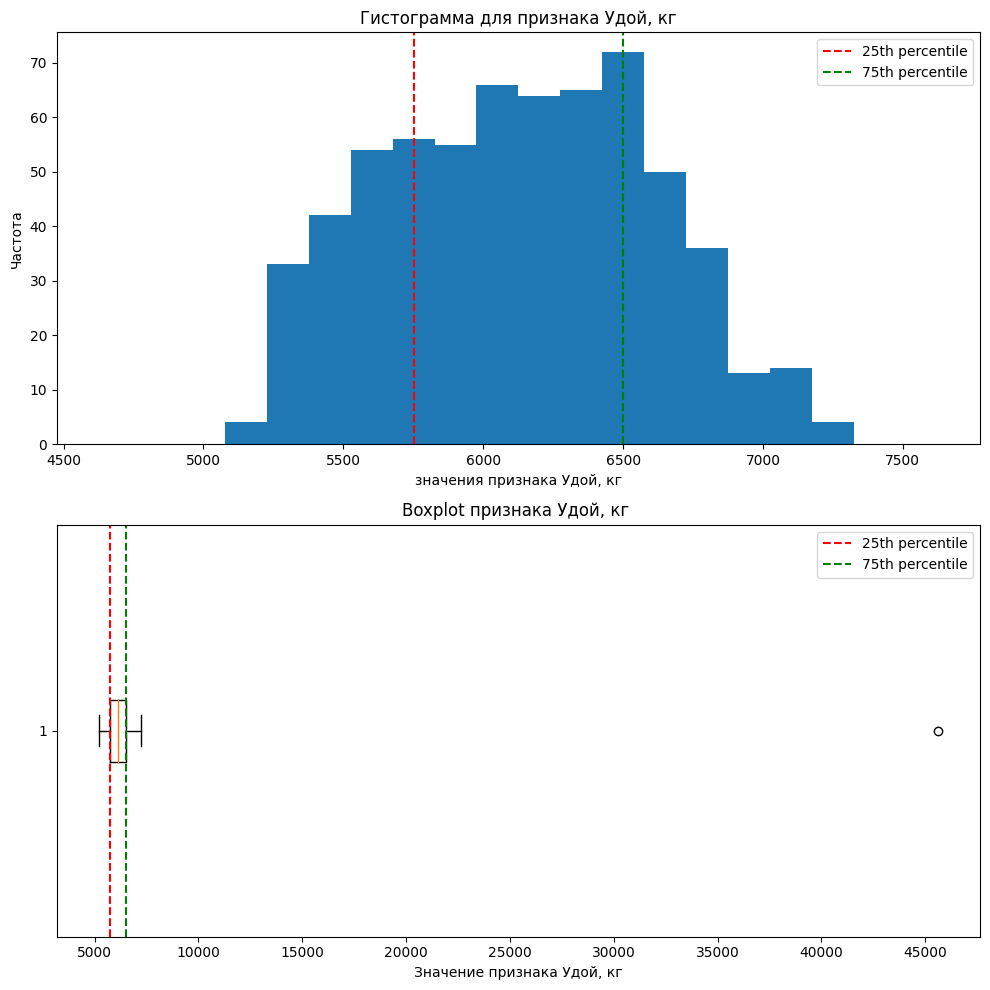

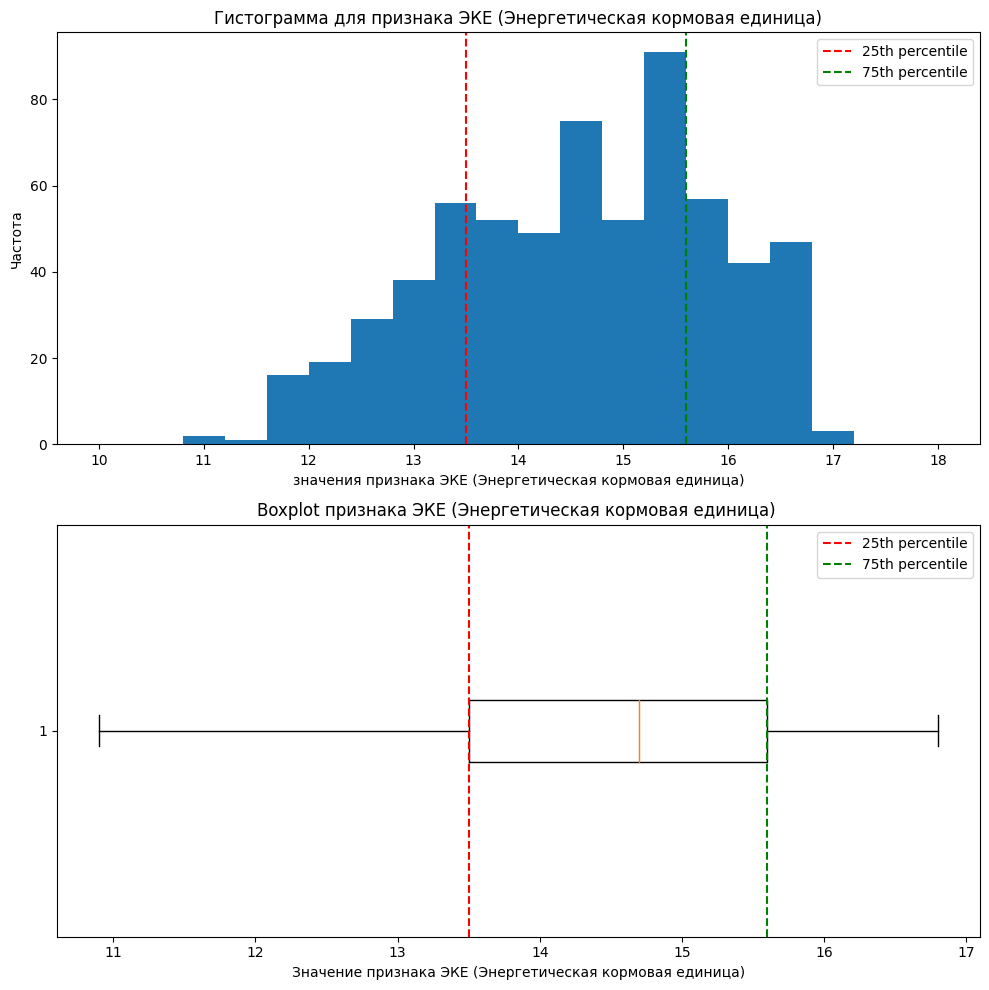

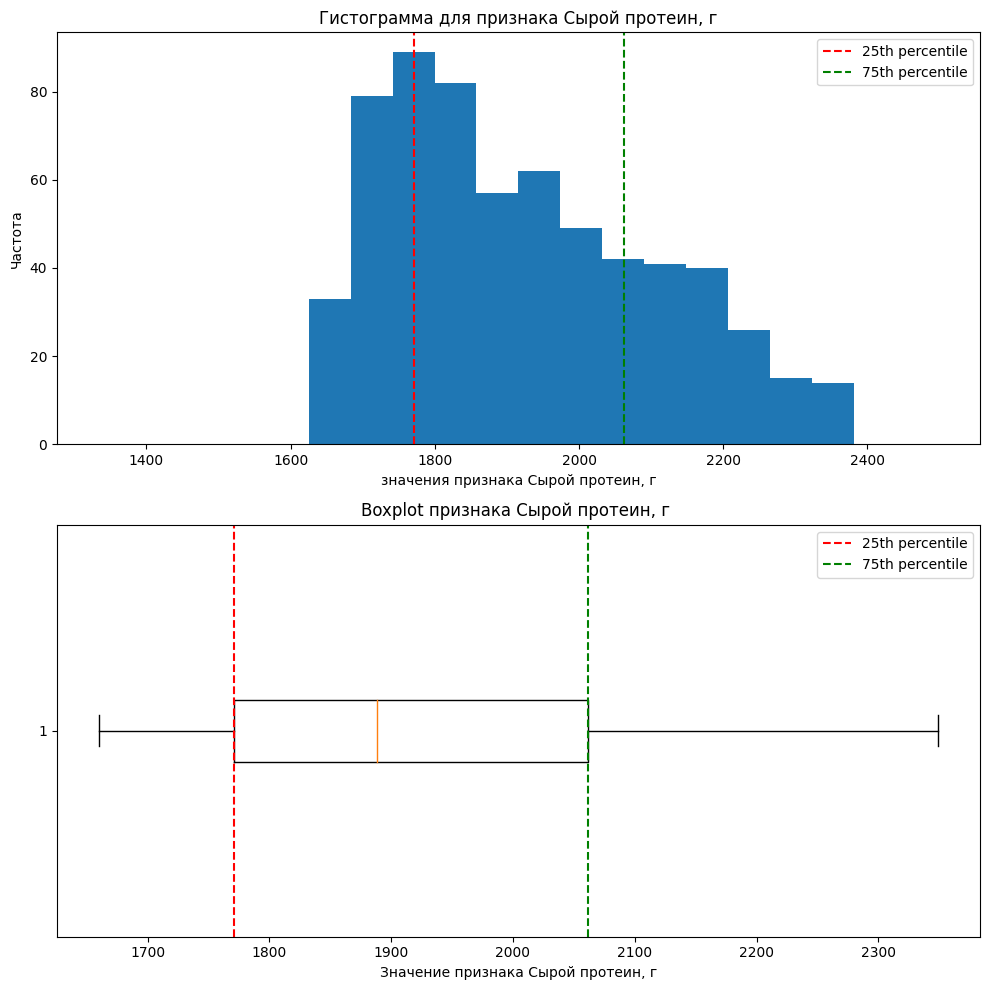

In [223]:


dataset_name= 'Ферма'
for col in numeric_columns:

    df_for_plot= ferma_df[col]

    # Рассчитываем квартили
    q25, q75 = df_for_plot.quantile(0.25), df_for_plot.quantile(0.75)
    min_val = int(q25- 1.5*(q75-q25))
    max_val= int(q75 +  1.5*(q75-q25))

    # Создаем новый график
    plt.figure(figsize=(10, 10))

    # Строим гистограмму
    plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
    plt.hist(df_for_plot, bins=20, range=(min_val, max_val))
    plt.title(f'Гистограмма для признака {dict_names[col]}')
    plt.xlabel(f'значения признака {dict_names[col]}')
    plt.ylabel(f'Частота')


    # Помечаем квартили на гистограмме
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()

    # Строим график boxplot
    plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
    plt.boxplot(df_for_plot, vert=False)
    plt.title(f'Boxplot признака {dict_names[col]} ')
    plt.xlabel(f'Значение признака {dict_names[col]}')

    # Помечаем квартили на boxplot
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()


    # Показываем графики
    plt.tight_layout()  # Для автоматического выравнивания графиков
    plt.show()


        

Графиков гистограмм для датасета Коровы для продажи нет - там остались только дискретные признаки и категориальные признаки

In [227]:
ferma_df.sort_values('milk_yield_kg', ascending=False).head()

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
16    17          45616               11.5             1675   
70    71           7222               16.8             2157   
135  136           7207               16.6             2343   
296  297           7201               15.8             2077   
294  295           7197               15.6             2241   

     sugar_protein_ratio  cow_is_sovering  pasture_is_hill  bull_is_sovering  \
16                  0.93                0                1                 0   
70                  0.95                0                1                 0   
135                 0.94                0                1                 0   
296                 0.94                1                1                 0   
294                 0.94                1                1                 0   

     milk_fat_percent  percent_protein_in_milk  is_tasty  is_old bull_name  
16               3.22                    3.076         1       1    Буйный  
70               3.70                    3.076         1       1  Геркулес  
135              3.72                    3.078         1       1    Буйный  
296              3.71                    3.072         1       1    Буйный  
294              3.71                    3.075         1       1    Буйный

Что видим по графикам удоя: 

 Удой распределен нормально, однако есть выброс - значение больше 45 000 кг. Явная ошибка. Причем, все показатели по этой корове ниже, чем у остальных - скорее всего, значение удоя меньше в 10 раз. Но значение 4500 тоже будет выбросом - судя по boxplot. Поэтому просто удалим эту строку

In [232]:
ferma_df.drop(index=16, inplace=True)

Посмотрим на итог

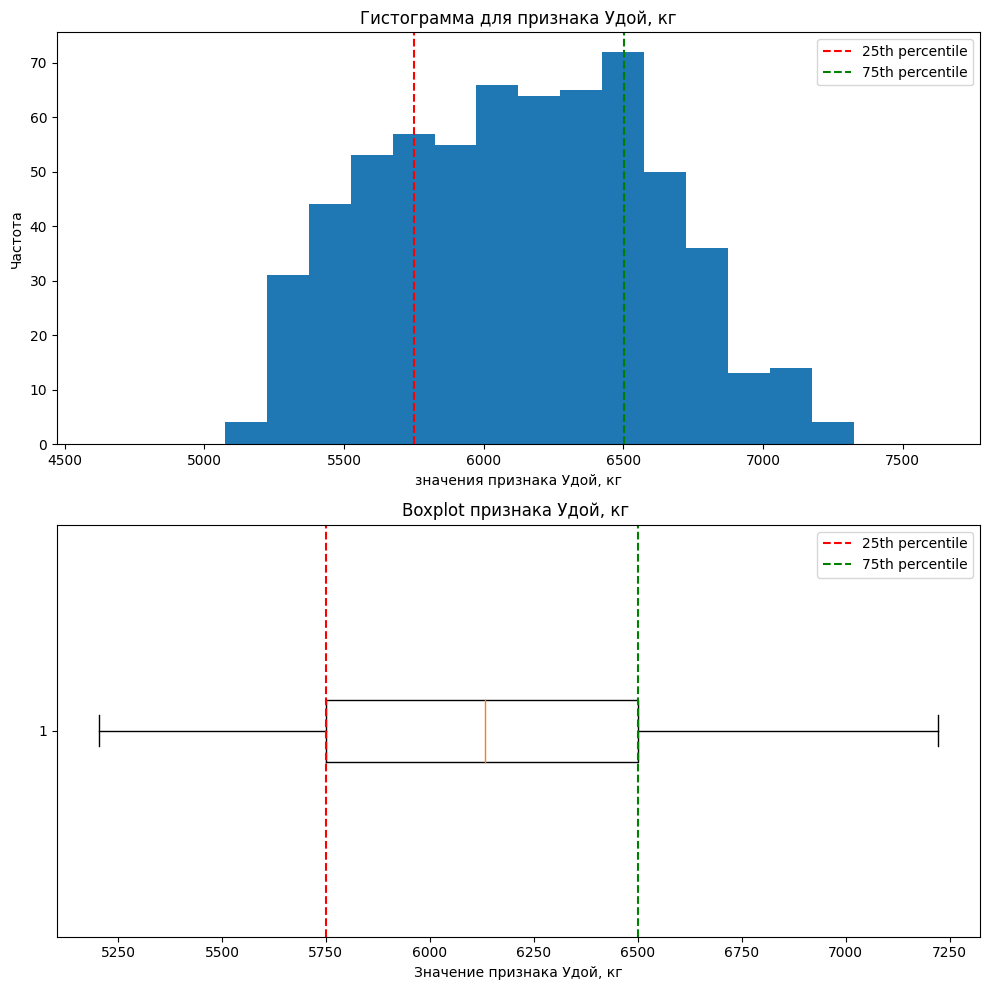

In [233]:


dataset_name= 'Ферма'


df_for_plot= ferma_df.milk_yield_kg
col = 'milk_yield_kg'

# Рассчитываем квартили
q25, q75 = df_for_plot.quantile(0.25), df_for_plot.quantile(0.75)
min_val = int(q25- 1.5*(q75-q25))
max_val= int(q75 +  1.5*(q75-q25))

# Создаем новый график
plt.figure(figsize=(10, 10))

# Строим гистограмму
plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
plt.hist(df_for_plot, bins=20, range=(min_val, max_val))
plt.title(f'Гистограмма для признака {dict_names[col]}')
plt.xlabel(f'значения признака {dict_names[col]}')
plt.ylabel(f'Частота')


# Помечаем квартили на гистограмме
plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
plt.legend()

# Строим график boxplot
plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
plt.boxplot(df_for_plot, vert=False)
plt.title(f'Boxplot признака {dict_names[col]} ')
plt.xlabel(f'Значение признака {dict_names[col]}')

# Помечаем квартили на boxplot
plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
plt.legend()


# Показываем графики
plt.tight_layout()  # Для автоматического выравнивания графиков
plt.show()


    

**Выводы по графикам непрерывных признаков: (есть только у данных по Ферме)**

1) Удой: <font color='red'> этот показатель предстоит предсказать для коров на продажу</font> 
    - распределен нормально
    - обнаружен выброс - ошибка в данных - удален
    - половина значений лежит в диапазоне от 5750 до 6500 кг в год

Значит при прогнозировании удоя для коров, которых собираемся купить, мы стремимся попасть в этот диапазон




2) Энергетическая кормовая единица (показатель питательности корма коровы)
    - распределение похоже на нормально с небольшим смещением вправо и бимодальностью на значениях 14.5 и 15.5
    - не имеет выбросов
    - половина всех значений лежит в диапазоне от 13.5 до 15.7


3) Сырой протеин:
    - распределение похоже на нормальное со смещением влево
    - не имеет выбросов
    - половина всех значений лежит в диапазоне от 1780 г до 2070 г


##### 3.2.2 Графики для категориальных и дискретных признаков

Графики категориальных и дискретных признаков для датасета Ферма


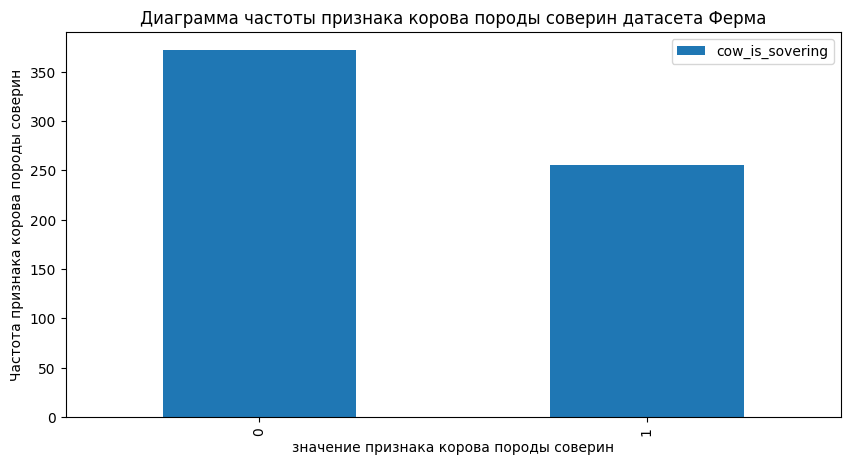

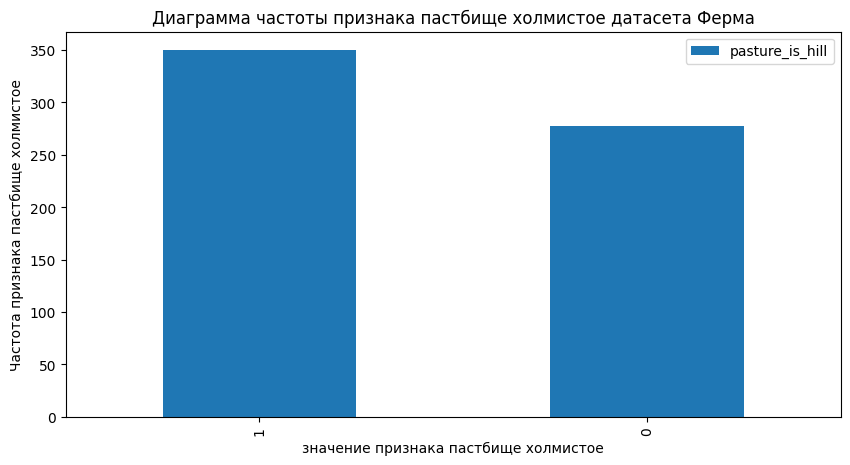

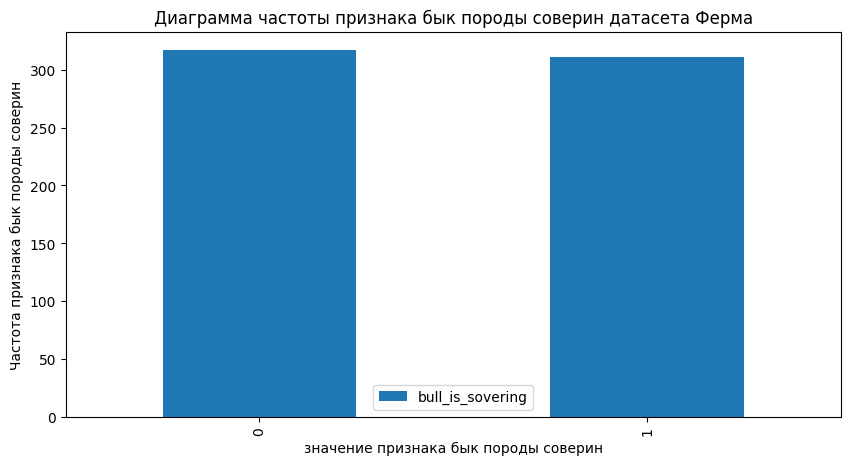

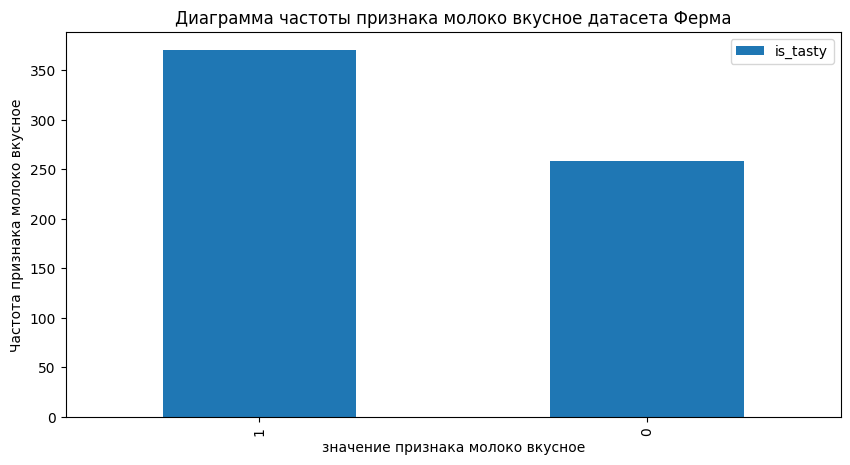

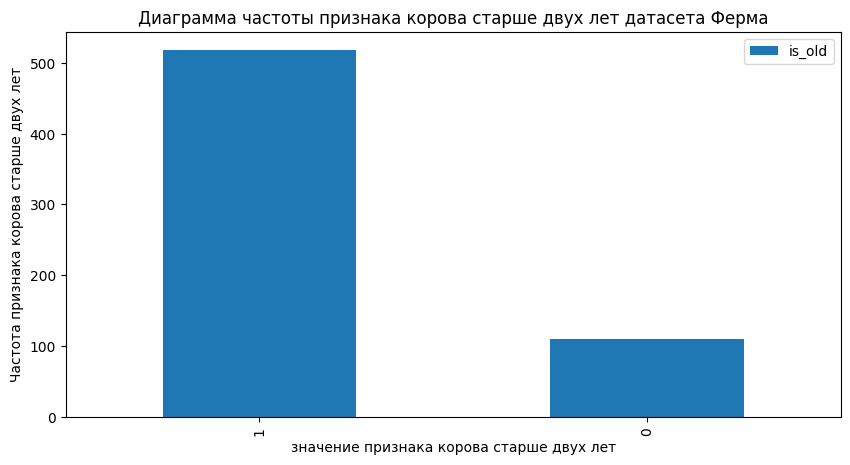

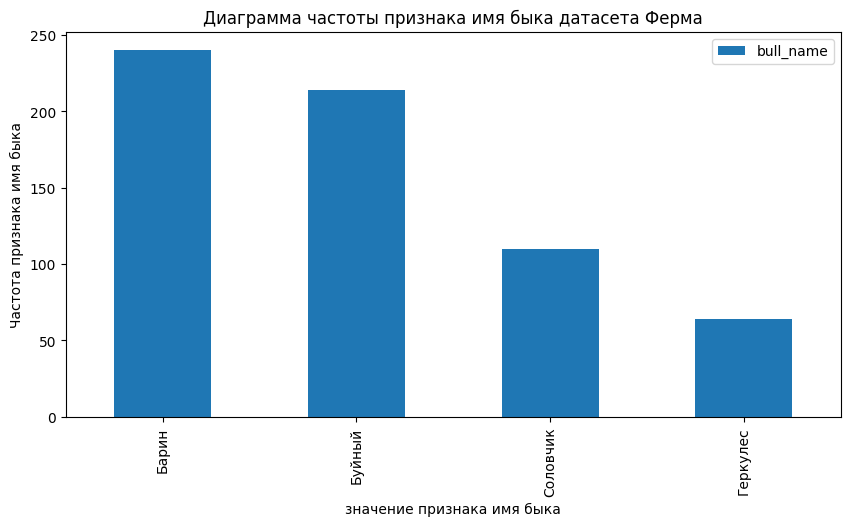

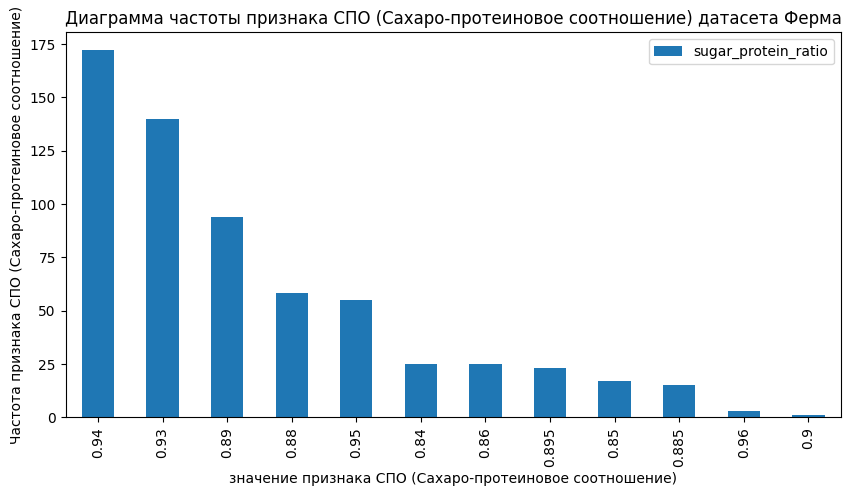

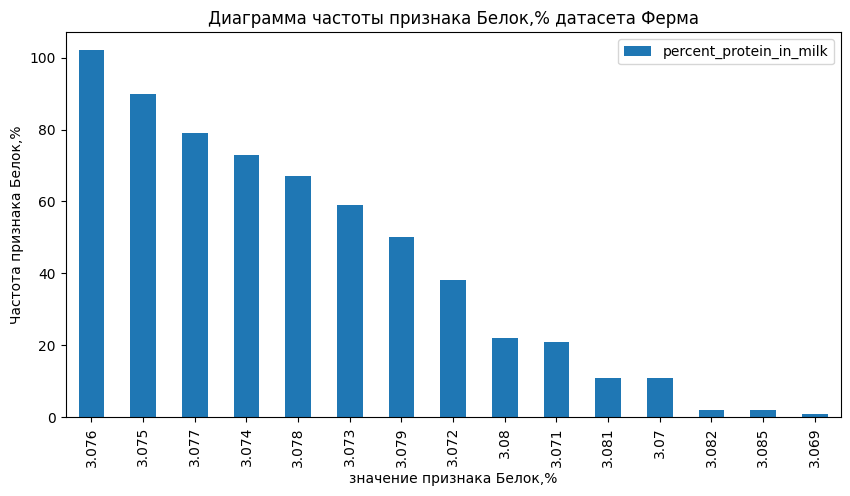

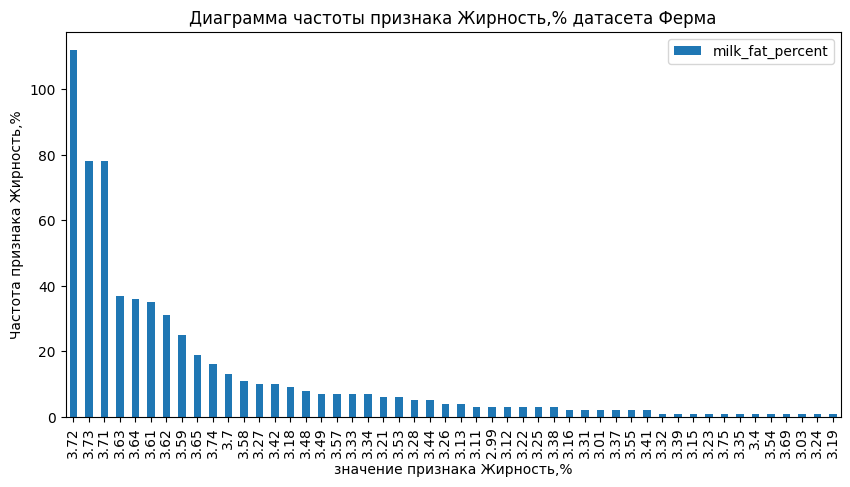

Графики категориальных и дискретных признаков для датасета Коровы для продажи


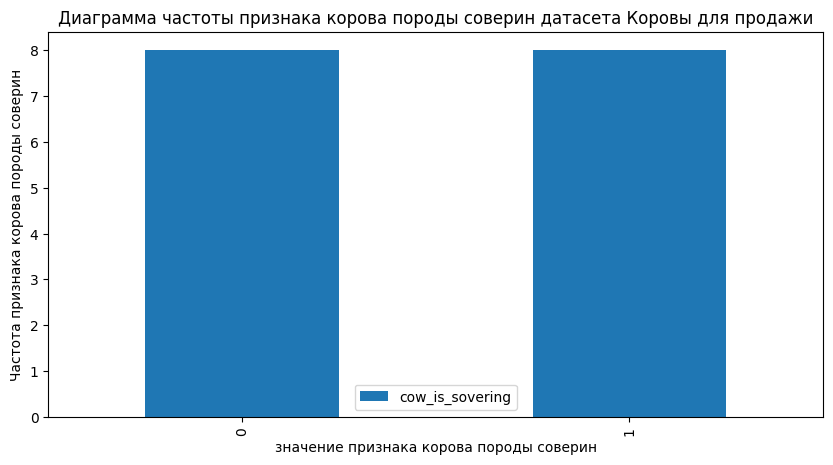

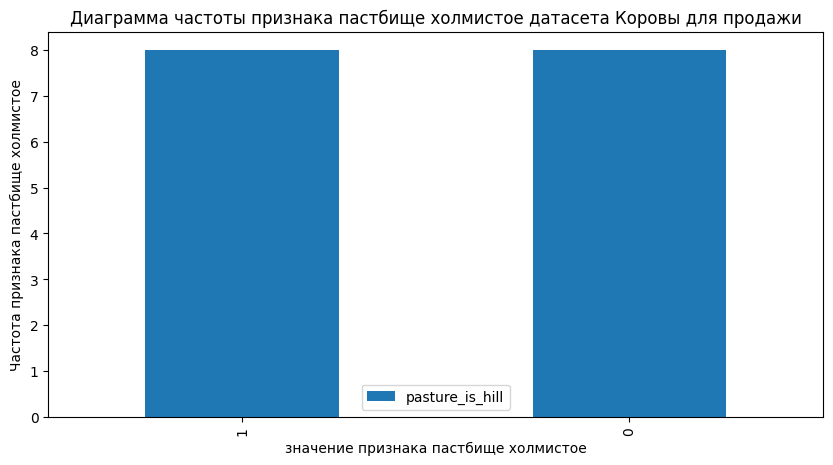

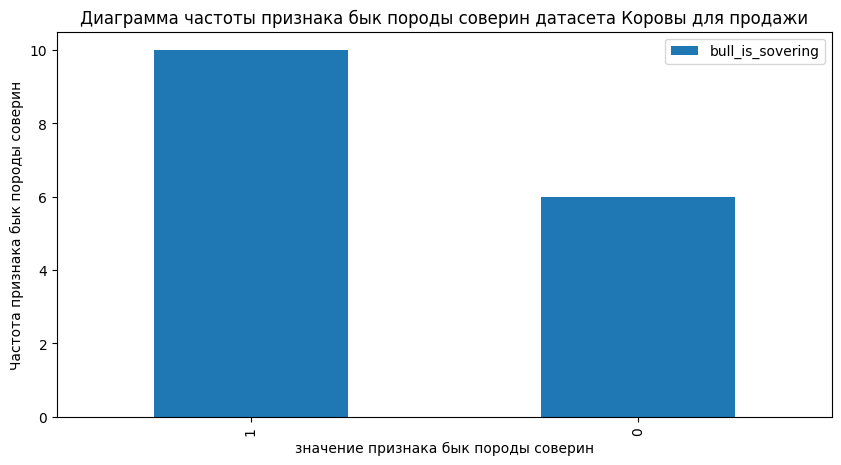

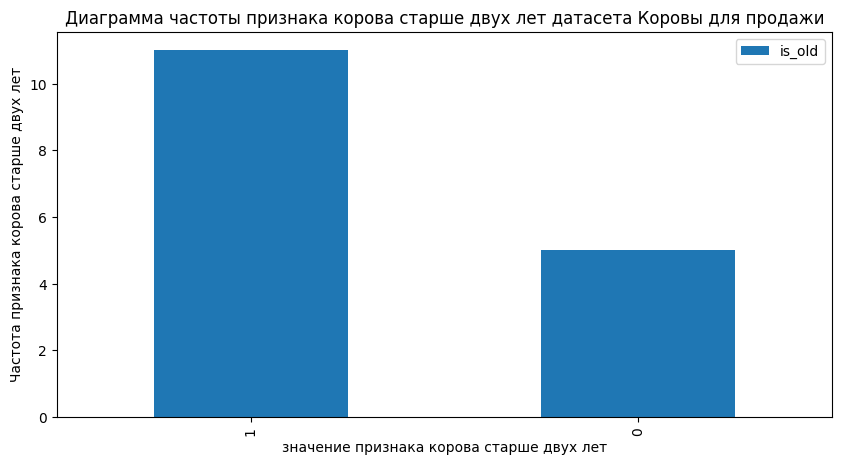

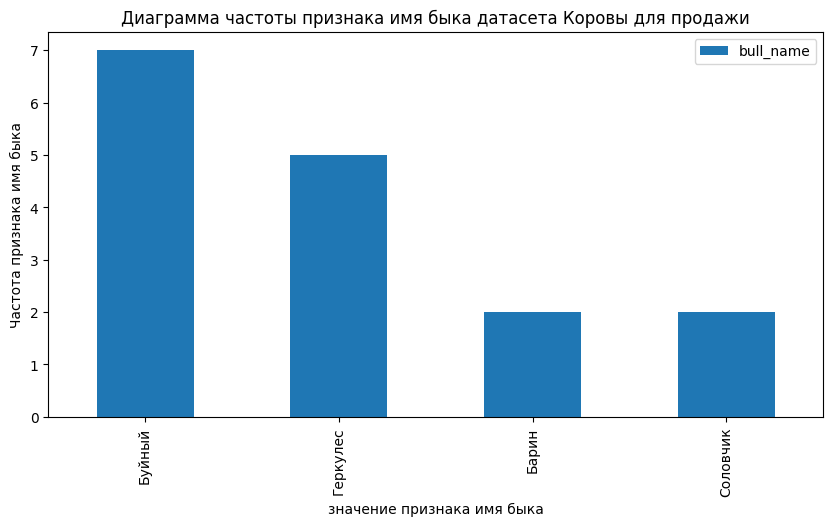

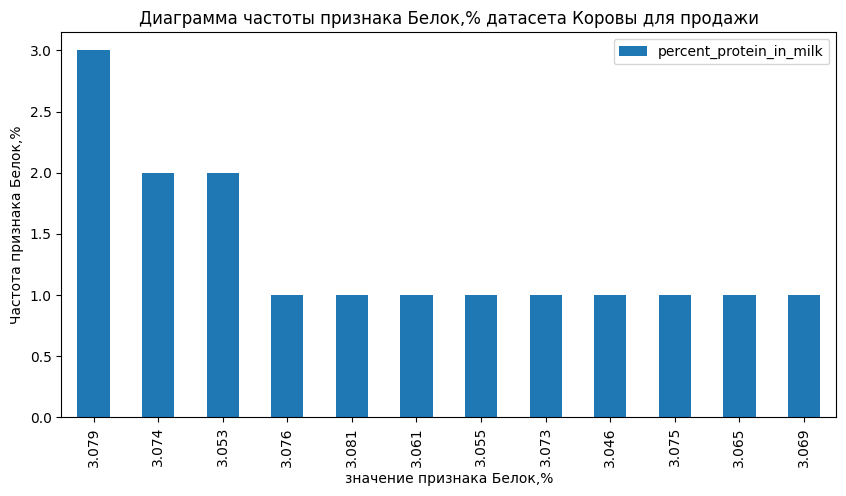

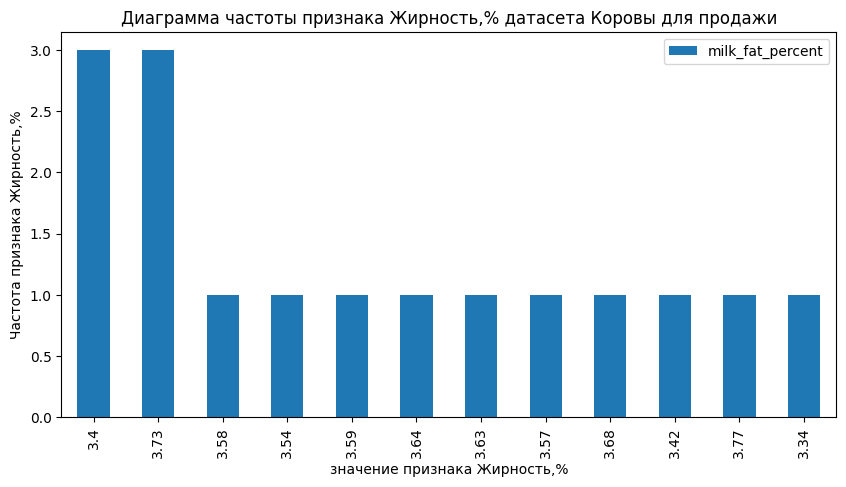

In [244]:

for ind in range(2):
    dataset = (ferma_df, cow_buy_df)[ind]
    dataset_name= ('Ферма', 'Коровы для продажи')[ind]
    
    print(f'Графики категориальных и дискретных признаков для датасета {dataset_name}')
    for col in categorical_columns + discrete_columns:
        try:
            dataset[col].value_counts().plot(kind='bar', legend=True, figsize=(10,5))
            plt.title(f'Диаграмма частоты признака {dict_names[col]} датасета {dataset_name}')
            plt.xlabel(f'значение признака {dict_names[col]}')
            plt.ylabel(f'Частота признака {dict_names[col]}')
            plt.show()
            
        except KeyError:
            continue

**Выводы по графикам категориальных признаков:**


1) Порода коров: 
    - на ферме преобладают коровы породы Айдиал
    - на продажу предлагается 8 коров Соверин и 8 коров Айдиал

2) Тип пастбища:
    - коровы на ферме в основном пасутся на холмистых пастбищах
    - коровы на продажу: 8 на холмистых, 8 - на равнивнных 

3) Порода быков:
    - коровы на ферме имеют примерно одинаковое соотношение отцов-соверинов и отцов-айдиалов
    - коровы на продажу: у 10 отцы - соверины, у 6 - айдиалы

4) Вкус молока:
    - у коров на ферме в основном вкусное молоко (примерно 60/40 в пользу вкусного молока)
    - у коров на продажу: <font color='red'>предстоит предсказать</font> 

5) Возраст коров:
    - на ферме подавляющее большинство коров старше 2 лет (примерно 85/15)
    - на продажу 11 коров старше 2 лет, и 5 - младше

6) Сахаро-протеиновое соотношение в корме коровы:
    - на ферме чаще всего встречаются значения 0.94, 0.93 , 0.89, 0.88. Остальные намного реже
    - у коров на продажу этот показатель отсутствует

7) Процент белка в молоке:
    - у коров на ферме чаще всего от 3.072 до 3.079. Самое частое значение - 3.076 (более, чем у 100 коров)
    - у коров на продажу: 20% с хорошим показателем белка (3 коровы - 3.079), остальные - от 3.05 до 3.08

8) Жирность молока:
    - у коров на ферме: около 40% выдают жирность 3.71-3.73%, меньше 30% коров - около 3.6%, остальные - в диапазоне 3-3.5%  
    - у коров на продажу разнообразнее: 3 коровы с высоким показателем 3.73, 3 коровы с низким - 3.4. Остальные дают молоко с жирностью в этом диапазоне

9) Имя быка:
    - у коров на ферме самые частые отцы - Барин и Буйный (75% коров), у остальных - Соловчик и Геркулес (25%)
    - у коров на продажу - самый частый отец Буйный (7 коров), потом Геркулес (5 коров), у 4 - Барин и Соловчик


### Шаг 4. Корреляционный анализ признаков в датасете 

In [245]:
ferma_df.head()

id  milk_yield_kg  energy_feed_unity  crude_protein_g  sugar_protein_ratio  \
0   1           5863               14.2             1743                0.890   
1   2           5529               12.8             2138                0.890   
2   3           5810               14.0             1854                0.885   
3   4           5895               12.4             2012                0.885   
4   5           5302               12.8             1675                0.885   

   cow_is_sovering  pasture_is_hill  bull_is_sovering  milk_fat_percent  \
0                0                0                 0              3.58   
1                0                0                 1              3.54   
2                1                1                 1              3.59   
3                1                1                 0              3.40   
4                0                0                 1              3.73   

   percent_protein_in_milk  is_tasty  is_old bull_name  
0                    3.076         1       1    Буйный  
1                    3.079         1       0  Соловчик  
2                    3.074         0       1     Барин  
3                    3.075         0       1    Буйный  
4                    3.073         1       0     Барин

In [246]:
numeric_columns

['milk_yield_kg', 'energy_feed_unity', 'crude_protein_g']

In [247]:
discrete_columns

['sugar_protein_ratio', 'percent_protein_in_milk', 'milk_fat_percent']

#### 4.1 Коэффицициенты корреляции Пирсона для числовых значений

In [248]:
ferma_df[numeric_columns+discrete_columns].corr()

milk_yield_kg  energy_feed_unity  crude_protein_g  \
milk_yield_kg                 1.000000           0.765098         0.446731   
energy_feed_unity             0.765098           1.000000         0.387875   
crude_protein_g               0.446731           0.387875         1.000000   
sugar_protein_ratio           0.806339           0.749007         0.446332   
percent_protein_in_milk       0.002966          -0.008939         0.226802   
milk_fat_percent              0.600902           0.637279         0.357793   

                         sugar_protein_ratio  percent_protein_in_milk  \
milk_yield_kg                       0.806339                 0.002966   
energy_feed_unity                   0.749007                -0.008939   
crude_protein_g                     0.446332                 0.226802   
sugar_protein_ratio                 1.000000                 0.073718   
percent_protein_in_milk             0.073718                 1.000000   
milk_fat_percent                    0.629098                -0.026542   

                         milk_fat_percent  
milk_yield_kg                    0.600902  
energy_feed_unity                0.637279  
crude_protein_g                  0.357793  
sugar_protein_ratio              0.629098  
percent_protein_in_milk         -0.026542  
milk_fat_percent                 1.000000

Построим тепловую карту корреляции числовых признаков Фермы

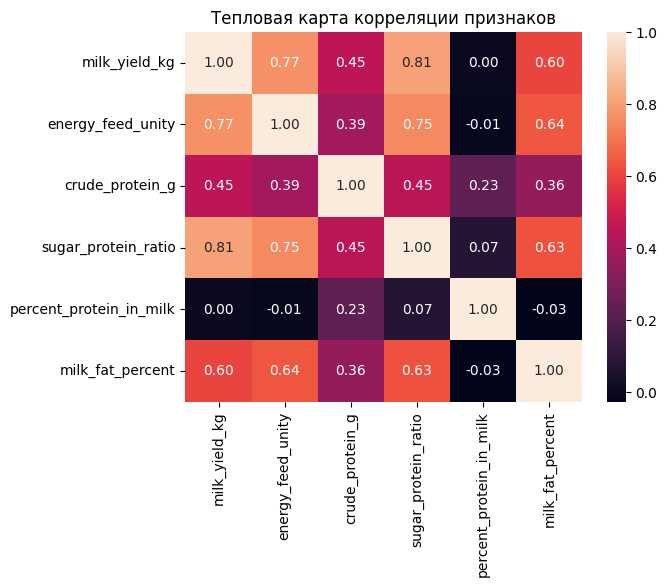

In [255]:
ax = plt.axes()
sns.heatmap(ferma_df[numeric_columns+discrete_columns].corr(), annot=True, fmt='.2f', ax=ax)

ax.set_title('Тепловая карта корреляции признаков')
plt.show()



Вывод по корреляции числовых признаков: 
1) Удой неплохо коррелирует со всеми признаками, кроме содержания белка в молоке

2) Процент содержания белка: 
    - немного коррелирует с содержанием белка в корме 
    - но больше ни с чем

3) Жирность молока:
    - неплохо коррелирует с ЭКЕ и сахаро-протеиновым соотношением
    - похуже - с содержанием белка в корме
    - и никак - с содержанием белка в молоке

это нормально - очень важно, чем ты кормишь корову

4) ЭКЕ:
    - неплохо коррелирует с сахаро-белковым соотношением и жирностью молока, 
    - чуть хуже с содержанием протеина в корме 
    - и никак - с содержанием белка в молоке

5) показатели по корму в целом коррелируют между собой 



#### 4.2 Диаграммы рассеяния для признака Удой и всех количественных признаков с учётом значения категориальных признаков

In [257]:
ferma_df.columns

Index(['id', 'milk_yield_kg', 'energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'milk_fat_percent', 'percent_protein_in_milk',
       'is_tasty', 'is_old', 'bull_name'],
      dtype='object')

In [258]:
numeric_columns+discrete_columns

['milk_yield_kg',
 'energy_feed_unity',
 'crude_protein_g',
 'sugar_protein_ratio',
 'percent_protein_in_milk',
 'milk_fat_percent']

In [314]:
categorical_columns

['cow_is_sovering',
 'pasture_is_hill',
 'bull_is_sovering',
 'is_tasty',
 'is_old',
 'bull_name']

In [315]:
dict_names

{'milk_yield_kg': 'Удой, кг',
 'energy_feed_unity': 'ЭКЕ (Энергетическая кормовая единица)',
 'crude_protein_g': 'Сырой протеин, г',
 'sugar_protein_ratio': 'СПО (Сахаро-протеиновое соотношение)',
 'cow_is_sovering': 'корова породы соверин',
 'bull_is_sovering': 'бык породы соверин',
 'pasture_is_hill': 'пастбище холмистое',
 'milk_fat_percent': 'Жирность,%',
 'percent_protein_in_milk': 'Белок,%',
 'is_tasty': 'молоко вкусное',
 'is_old': 'корова старше двух лет',
 'bull_name': 'имя быка'}

Строим графики рассеяния Удоя относительно численных признаков с учетом разных значений категориальных признаков

Создадим функцию построения графиков

In [350]:
def plot_scatter_for_df(some_df,num_feat, cat_feat, target_feature='milk_yield_kg'):

    # забираем истинные имена признаков
    num_feature_name = dict_names[num_feat]
    cat_feat_name = dict_names[cat_feat]

    # Создаем scatter-plot с линиями тренда для каждой группы точек
    fig = px.scatter(some_df, x=num_feat, y=target_feature, color=cat_feat,
                    color_discrete_map={0: 'blue', 1: 'yellow'},
                    title= f'График рассеяния Удоя по {num_feature_name} с учетом признака "{cat_feat_name}"',
                    labels= {num_feat: num_feature_name, target_feature: 'Удой, кг'},
                    )

    # Фильтруем данные для каждой группы точек
    data_yellow = some_df[some_df[cat_feat] == 1]
    data_blue = some_df[some_df[cat_feat] == 0]

    # Добавляем линию тренда для красных точек
    fig.add_trace(px.scatter(data_yellow, 
                            x=num_feat, 
                            y=target_feature, 
                            trendline='ols',
                            trendline_color_override= 'orange',
                            color_continuous_scale=False).data[1])

    # Добавляем линию тренда для синих точек
    fig.add_trace(px.scatter(data_blue, 
                            x=num_feat, 
                            y=target_feature, 
                            trendline='ols',
                            trendline_color_override= 'blue',
                            color_continuous_scale=False).data[1])


    # Добавляем описание легенды
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='yellow'), 
                             showlegend=True, name=f'{cat_feat_name} = да'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='blue'), 
                             showlegend=True, name=f'{cat_feat_name} = нет'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='orange'), 
                             showlegend=True, name=f'линия тренда для {cat_feat_name}=да'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='blue'), 
                             showlegend=True, name=f'линия тренда для {cat_feat_name}=нет'))

    # Перемещаем легенду над графиком
    fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

    # Показываем график
    fig.show()


In [360]:
# напишем отдельную функцию для признака "Имя быка" - у него 4 значения

def plot_scatter_for_df_2(some_df,num_feat, cat_feat, target_feature='milk_yield_kg'):

    # забираем истинные имена признаков
    num_feature_name = dict_names[num_feat]
    cat_feat_name = dict_names[cat_feat]    

    # Создаем scatter-plot с линиями тренда для каждой группы точек
    fig = px.scatter(some_df, x=num_feat, y=target_feature, color=cat_feat,
                    title= f'График рассеяния Удоя по {num_feature_name} с учетом признака {cat_feat_name}',
                    labels= {'num_feat': num_feature_name,'milk_yield_kg': 'Удой, кг'},
                    )

    # Фильтруем данные для каждой группы точек
    data_red = ferma_df[ferma_df['bull_name'] == 'Соловчик']
    data_blue = ferma_df[ferma_df['bull_name'] == 'Буйный']
    data_green = ferma_df[ferma_df['bull_name'] == 'Барин']
    data_violet = ferma_df[ferma_df['bull_name'] == 'Геркулес']


    # Добавляем линию тренда для красных точек
    fig.add_trace(px.scatter(data_red, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'red',
                            color_continuous_scale=False).data[1])

    # Добавляем линию тренда для синих точек
    fig.add_trace(px.scatter(data_blue, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'blue',
                            color_continuous_scale=False).data[1])

    # Добавляем линию тренда для зеленых точек
    fig.add_trace(px.scatter(data_green, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'green',
                            #color_continuous_scale=False
                            ).data[1])

    # Добавляем линию тренда для фиолетовых точек
    fig.add_trace(px.scatter(data_violet, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'violet',
                            #color_continuous_scale=False
                            ).data[1])

    # Показываем график
    fig.show()


Запускаем цикл построения графиков

In [363]:
for col_1 in numeric_columns+discrete_columns:  # цикл по числовым признакам
    if col_1 == 'milk_yield_kg': continue       # диаграмма рассеяния бессмысленна для зависимости удоя от удоя
    
    for col_2 in categorical_columns:           # цикл по категориальным признакам
        if col_2=='bull_name':
            plot_scatter_for_df_2(some_df= ferma_df, 
                            num_feat=col_1, 
                            cat_feat=col_2,
                            target_feature='milk_yield_kg')

        else: 
            plot_scatter_for_df(some_df= ferma_df, 
                            num_feat=col_1, 
                            cat_feat=col_2,
                            target_feature='milk_yield_kg')

**Вывод по корреляции удоя с числовыми признаками с учетом категориальных признаков:**

1) ЭКЕ корма коровы
    - линейная корреляция  <font color='red'>вне зависимости</font> от породы коровы, типа пастбища, вкусности молока, имени быка
    - линейная корреляция с учетом породы быка, однако корреляция немного выше для коров, чьи отцы - породы Айдиал
    - линейная корреляция для коров старше 2 лет, однако очень низкая для коров младше 2 лет (молодые буренки доятся хорошо и без высокого значения корма)

2) Сырой протеин в корме коровы
    - линейная корреляция  <font color='red'>вне зависимости</font> от породы коровы, типа пастбища, породы быка, вкусности молока, имени быка
    - линейная корреляция для коров старше 2 лет, однако очень низкая для коров младше 2 лет (молодые буренки доятся хорошо и без высокого значения корма)

3) Сахаро-протеиновое соотношение в корме коровы: данные дискретны, сложно назвать такое соотношение линейным, однако зависимости от категориальных признаков аналогичны - для коров младше 2 лет влиняния на удой нет

4) Содержание белка в молоке - графики подтверждают отсутствие корреляции

5) Жирность молока - типы корреляции аналогичны корреляции удоя с ЭКЕ по различным категориальным признакам

#### 4.3 Общие выводы по корреляции


1) В основном наблюдается линейная корреляция между Удоем (целевой показатель) и численными признаками. Иключение: содержание белка в молоке (практически полное отсутствие корреляции)

2) Величина корреляции практически не зависит от категориальных показателей, однако очень низкая для молодых коров - они доятся одинаково вне зависимости от составляющих корма

3) Возможно, есть нелинейная связь между Удоем и содержанием белка в молоке, хотя вряд ли: белок в молоке коррелирует с белком в корме. Вводить дополнительные признаки не требуется 

4) Показатели по корму (ЭКЕ, содержание протеина, сахаро-протеиновое соотношение) коррелируют между собой, особенно ЭКЕ и СПС (значение к-та Пирсона = 0.75). Однако, мультиколлинеарными считаются признаки с корреляцией от 0.9. Поэтому удалять эти признаки не будем

### Шаг 5. Линейная Регрессия 

#### 5.1 Первая модель до настройки

##### 5.1.1 Выбор признаков для прогнозирования

Целевой признак - Удой (молока в кг)

Входные признаки для прогнозирования:
1) Показатели корма
    - ЭКЕ (energy_feed_unity)
    - содержание протеина (crude_protein_g)
    - СПО (sugar_protein_ratio)
2) Порода
    - коровы (cow_is_sovering)
    - быка (bull_is_sovering)
3) Отец коровы
    - имя быка (bull_name)

4) Тип пастбища (pasture_is_hill)
5) Возраст коровы (is_old)


Показатели вкуса молока, содержания белка и жирность использовать не будем - они никак не влияют на величину удоя

In [367]:
y=ferma_df.milk_yield_kg
X= ferma_df[['energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'is_old', 'bull_name']]


##### 5.1.2 Разобьем данные на тренировочную и тестовую выборки

In [368]:
RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

##### 5.1.3 Кодируем категориальные признаки

У нас остался только один некодированный признак - имя быка

In [390]:

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder = OneHotEncoder(sparse=False, drop='first')

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[['bull_name']])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [393]:
X_test_ohe.head()

bull_name_Буйный  bull_name_Геркулес  bull_name_Соловчик
0               0.0                 1.0                 0.0
1               0.0                 0.0                 1.0
2               0.0                 0.0                 0.0
3               0.0                 0.0                 0.0
4               0.0                 0.0                 0.0

In [394]:
X_train_ohe.head()

bull_name_Буйный bull_name_Геркулес bull_name_Соловчик
0              0.0                0.0                1.0
1              0.0                0.0                0.0
2              1.0                0.0                0.0
3              1.0                0.0                0.0
4              0.0                1.0                0.0

##### 5.1.4 Кодируем количественные признаки

In [400]:
num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio']

# создайте переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем масштабированные данные с именами столбцов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [401]:
X_train_scaled.head()

energy_feed_unity  crude_protein_g  sugar_protein_ratio
0           1.502378         1.079523             0.837130
1          -1.557270        -0.196920            -0.703660
2           0.125537        -1.386085            -1.011818
3          -0.103937         0.752230             0.837130
4          -1.098323         0.828598            -0.703660

In [402]:
X_test_scaled.head()

energy_feed_unity  crude_protein_g  sugar_protein_ratio
0          -0.486393        -0.813322            -1.011818
1           1.425887         0.026730             0.837130
2          -0.486393        -0.682405            -1.628134
3          -0.945340        -1.058792            -1.011818
4           0.584484        -1.413360            -0.703660

##### 5.1.5 сшиваем все вместе

In [403]:
X_train.head()

energy_feed_unity  crude_protein_g  sugar_protein_ratio  cow_is_sovering  \
508               16.5             2123                 0.94                1   
383               12.5             1889                 0.89                1   
587               14.7             1671                 0.88                0   
197               14.4             2063                 0.94                0   
328               13.1             2077                 0.89                0   

     pasture_is_hill  bull_is_sovering  is_old bull_name  
508                1                 1       1  Соловчик  
383                1                 1       0     Барин  
587                0                 0       1    Буйный  
197                1                 0       1    Буйный  
328                0                 0       1  Геркулес

In [404]:
X_train.columns

Index(['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio',
       'cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old',
       'bull_name'],
      dtype='object')

In [410]:
X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)

X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)

In [411]:
X_train_non_encoded.head()

cow_is_sovering  pasture_is_hill  bull_is_sovering  is_old
0                1                1                 1       1
1                1                1                 1       0
2                0                0                 0       1
3                0                1                 0       1
4                0                0                 0       1

In [412]:
X_test_non_encoded.head()

cow_is_sovering  pasture_is_hill  bull_is_sovering  is_old
0                0                1                 0       1
1                1                1                 1       1
2                1                1                 1       0
3                0                0                 1       1
4                0                1                 1       1

сшиваем воедино

In [413]:
X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

In [416]:
X_train.shape

(471, 10)

In [417]:
X_test.shape

(157, 10)

In [414]:
X_train.head()

cow_is_sovering  pasture_is_hill  bull_is_sovering  is_old  \
0                1                1                 1       1   
1                1                1                 1       0   
2                0                0                 0       1   
3                0                1                 0       1   
4                0                0                 0       1   

   (bull_name_Буйный,)  (bull_name_Геркулес,)  (bull_name_Соловчик,)  \
0                  0.0                    0.0                    1.0   
1                  0.0                    0.0                    0.0   
2                  1.0                    0.0                    0.0   
3                  1.0                    0.0                    0.0   
4                  0.0                    1.0                    0.0   

   energy_feed_unity  crude_protein_g  sugar_protein_ratio  
0           1.502378         1.079523             0.837130  
1          -1.557270        -0.196920            -0.703660  
2           0.125537        -1.386085            -1.011818  
3          -0.103937         0.752230             0.837130  
4          -1.098323         0.828598            -0.703660

In [415]:
X_train.columns

Index([      'cow_is_sovering',       'pasture_is_hill',
            'bull_is_sovering',                'is_old',
         ('bull_name_Буйный',), ('bull_name_Геркулес',),
       ('bull_name_Соловчик',),     'energy_feed_unity',
             'crude_protein_g',   'sugar_protein_ratio'],
      dtype='object')

In [422]:
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                        ('bull_name_Геркулес',): 'bname_is_herc',
                        ('bull_name_Соловчик',): 'bname_is_sol'},
                        inplace=True)

In [428]:
X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                        'bull_name_Геркулес': 'bname_is_herc',
                        'bull_name_Соловчик': 'bname_is_sol'},
                        inplace=True)

In [424]:
X_train.head()

cow_is_sovering  pasture_is_hill  bull_is_sovering  is_old  bname_is_bui  \
0                1                1                 1       1           0.0   
1                1                1                 1       0           0.0   
2                0                0                 0       1           1.0   
3                0                1                 0       1           1.0   
4                0                0                 0       1           0.0   

   bname_is_herc  bname_is_sol  energy_feed_unity  crude_protein_g  \
0            0.0           1.0           1.502378         1.079523   
1            0.0           0.0          -1.557270        -0.196920   
2            0.0           0.0           0.125537        -1.386085   
3            0.0           0.0          -0.103937         0.752230   
4            1.0           0.0          -1.098323         0.828598   

   sugar_protein_ratio  
0             0.837130  
1            -0.703660  
2            -1.011818  
3             0.837130  
4            -0.703660

In [429]:
X_test.head()

cow_is_sovering  pasture_is_hill  bull_is_sovering  is_old  bname_is_bui  \
0                0                1                 0       1           0.0   
1                1                1                 1       1           0.0   
2                1                1                 1       0           0.0   
3                0                0                 1       1           0.0   
4                0                1                 1       1           0.0   

   bname_is_herc  bname_is_sol  energy_feed_unity  crude_protein_g  \
0            1.0           0.0          -0.486393        -0.813322   
1            0.0           1.0           1.425887         0.026730   
2            0.0           0.0          -0.486393        -0.682405   
3            0.0           0.0          -0.945340        -1.058792   
4            0.0           0.0           0.584484        -1.413360   

   sugar_protein_ratio  
0            -1.011818  
1             0.837130  
2            -1.628134  
3            -1.011818  
4            -0.703660

In [431]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [432]:
y_train

0      6498
1      5268
2      5610
3      6343
4      5833
       ... 
466    5718
467    6392
468    5971
469    5858
470    5591
Name: milk_yield_kg, Length: 471, dtype: int64

In [433]:
y_test

0      5980
1      6512
2      5392
3      5604
4      5667
       ... 
152    6686
153    6967
154    6248
155    5640
156    5372
Name: milk_yield_kg, Length: 157, dtype: int64

Построим гистограмму и boxplot для количественных данных - чтобу убедиться в корректности масштабирования

In [434]:
X_train.columns

Index(['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old',
       'bname_is_bui', 'bname_is_herc', 'bname_is_sol', 'energy_feed_unity',
       'crude_protein_g', 'sugar_protein_ratio'],
      dtype='object')

In [435]:
num_col_names =['energy_feed_unity','crude_protein_g', 'sugar_protein_ratio']

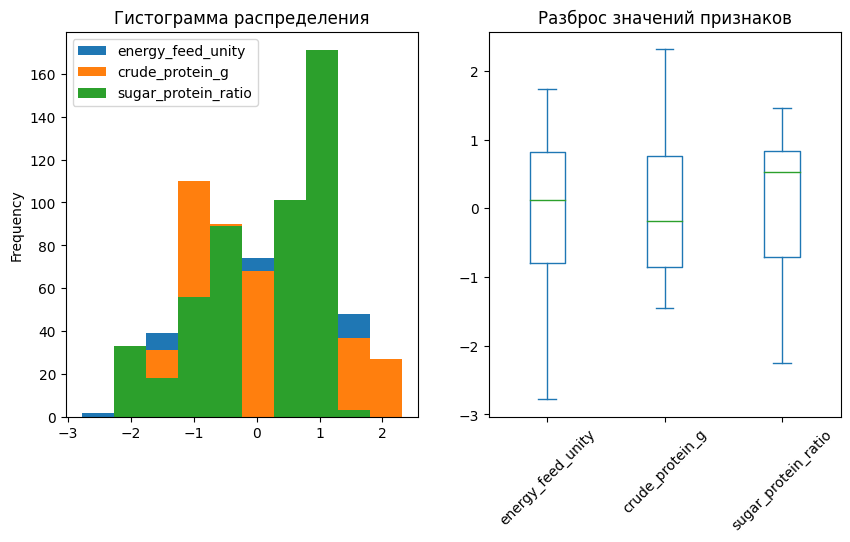

In [436]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [440]:
X_train[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

mean     std
energy_feed_unity     0.0  1.0011
crude_protein_g      -0.0  1.0011
sugar_protein_ratio   0.0  1.0011

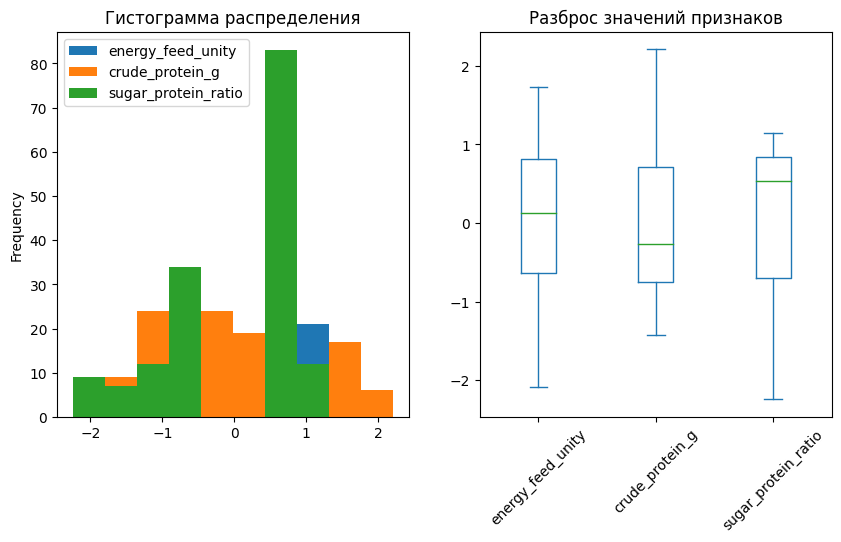

In [441]:
# постройте графики по количественным признакам тестового датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_test[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_test[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [442]:
X_test[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

mean     std
energy_feed_unity    0.0393  0.9822
crude_protein_g     -0.0292  0.9889
sugar_protein_ratio  0.0314  0.9709

Значения среднего приведены к нулю, значения стандартного отклонения - к единице

Данные готовы.

##### 5.1.5 Обучаем первую модель линейной регрессии

In [443]:
# инициализируйте модель линейной регрессии
model_lr  = LinearRegression()

# обучите модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получите предсказания модели на тестовых данных 
# сохраните результат в переменную predictions
predictions = model_lr.predict(X_test)

# посчитайте среднюю абсолютную ошибку на тестовых данных и выведите её на экран
mae = mean_absolute_error(y_test, predictions)
print(f'MAE = {mae:.0f}')

MAE = 156


Считаем коэффициент детерминации R2

In [444]:
r2 = r2_score(y_test, predictions) 
r2

0.8029336092311704

Итого видим, что:
- средняя ошибка модели по модулю составляет 156кг удоя в год
- точность модели - 80% (модель ошибается 1 раз из 5 наблюдений)

Посчитаем остатки и проанализируем их

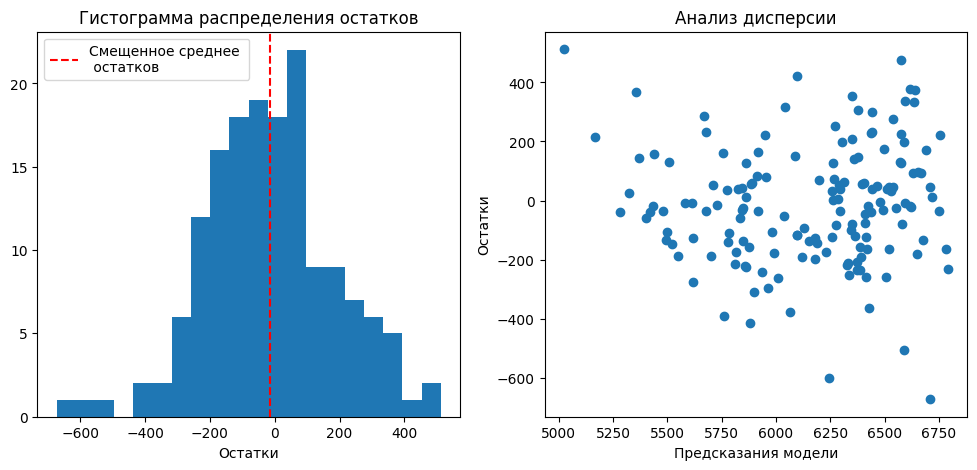

In [451]:
residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].hist(residuals, bins=20)
axes[0].axvline(residuals.mean(), color='r', linestyle='--', label='Смещенное среднее \n остатков')
axes[0].legend(loc='upper left')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Судя по графикам, модель завышает значения удоя, тем самым вводя в заблуждение.

Причем, дисперсия остатков не выглядит постоянной.



Вывод: модель требует доработки
- необходимо добавить в модель новые признаки
- нужно как-то трансформировать данные, чтобы изменить взаимосвязь входных признаков с целевым.

##### 5.1.6 Настройка модели

Посмотрев еще раз на диаграммы рассеяния в пункте 4.2 вспомним, что связь между Удоем и Сахаро-протеиновым соотношением (СПО) не является линейным

In [453]:
plot_scatter_for_df(some_df=ferma_df,
                    num_feat='sugar_protein_ratio', 
                    cat_feat='pasture_is_hill',
                    target_feature='milk_yield_kg')

Данные можно разделить на два кластера по СПО:
- СПО менее 0.91
- СПО более 0.91

In [454]:
X.head()

energy_feed_unity  crude_protein_g  sugar_protein_ratio  cow_is_sovering  \
0               14.2             1743                0.890                0   
1               12.8             2138                0.890                0   
2               14.0             1854                0.885                1   
3               12.4             2012                0.885                1   
4               12.8             1675                0.885                0   

   pasture_is_hill  bull_is_sovering  is_old bull_name  
0                0                 0       1    Буйный  
1                0                 1       0  Соловчик  
2                1                 1       1     Барин  
3                1                 0       1    Буйный  
4                0                 1       0     Барин

Превратим СПО в бинарный категориальный признак для выборки

In [503]:
X_new = X.copy(deep=True)

In [504]:
X_new['spr_is_less_091']= X_new.sugar_protein_ratio.apply(lambda x: 1 if x<0.91 else 0)

In [505]:
X_new.drop('sugar_protein_ratio', axis=1, inplace=True)

In [506]:
X_new.head()

energy_feed_unity  crude_protein_g  cow_is_sovering  pasture_is_hill  \
0               14.2             1743                0                0   
1               12.8             2138                0                0   
2               14.0             1854                1                1   
3               12.4             2012                1                1   
4               12.8             1675                0                0   

   bull_is_sovering  is_old bull_name  spr_is_less_091  
0                 0       1    Буйный                1  
1                 1       0  Соловчик                1  
2                 1       1     Барин                1  
3                 0       1    Буйный                1  
4                 1       0     Барин                1

In [507]:
X_new.shape

(628, 8)

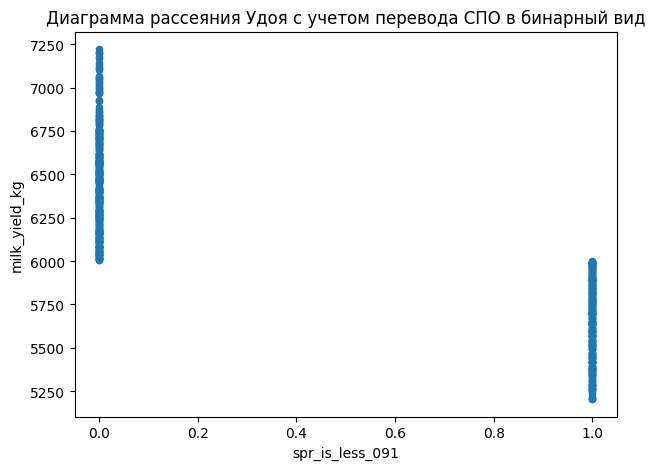

In [508]:
pd.merge(X_new, y.to_frame(), left_index=True, right_index=True)\
    .plot(kind= "scatter", x='spr_is_less_091', y='milk_yield_kg', figsize=(7,5))

plt.title('Диаграмма рассеяния Удоя с учетом перевода СПО в бинарный вид')
plt.show()

Также, диаграммы рассеяния в пункте 4.2 говорят, что связь между Удоем и Энергетической кормовой единицей (ЭКЕ) тоже не является линейным

In [509]:
plot_scatter_for_df(some_df=ferma_df,
                    num_feat='energy_feed_unity', 
                    cat_feat='pasture_is_hill',
                    target_feature='milk_yield_kg')

Возведем значение ЭКЕ в квадрат для устранения нелинейности

In [510]:
X_new['sq_efu'] = X_new.energy_feed_unity **2

In [511]:
X_new.drop('energy_feed_unity', axis=1, inplace=True)

In [512]:
X_new.head()

crude_protein_g  cow_is_sovering  pasture_is_hill  bull_is_sovering  \
0             1743                0                0                 0   
1             2138                0                0                 1   
2             1854                1                1                 1   
3             2012                1                1                 0   
4             1675                0                0                 1   

   is_old bull_name  spr_is_less_091  sq_efu  
0       1    Буйный                1  201.64  
1       0  Соловчик                1  163.84  
2       1     Барин                1  196.00  
3       1    Буйный                1  153.76  
4       0     Барин                1  163.84

In [513]:
X_new.shape

(628, 8)

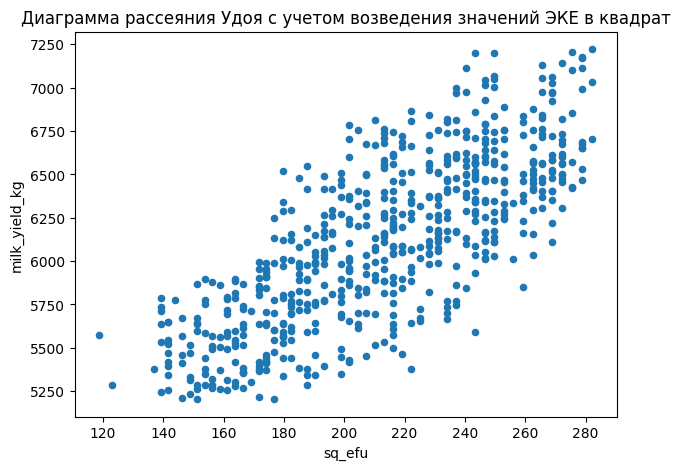

In [514]:
pd.merge(X_new, y.to_frame(), left_index=True, right_index=True)\
    .plot(kind= "scatter", x='sq_efu', y='milk_yield_kg', figsize=(7,5))

plt.title('Диаграмма рассеяния Удоя с учетом возведения значений ЭКЕ в квадрат')
plt.show()

#### 5.2 Вторая модель после приведения СПО в бинарный вид и возведения ЭКЕ в квадрат

##### 5.2.1 Снова подготавливаем данные для модели

In [515]:
# разбиваем данные на тренировочную и тестовую выборки

RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_new, 
    y, 
    random_state=RANDOM_STATE
)

### кодируем категориальный признак

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder = OneHotEncoder(sparse=False, drop='first')

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[['bull_name']])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

### кодируем количественные признаки

num_col_names = ['sq_efu', 'crude_protein_g']

# создайте переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем масштабированные данные с именами столбцов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)


### оставляем данные без кодирования

X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

### переименовываем столбцы
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                        ('bull_name_Геркулес',): 'bname_is_herc',
                        ('bull_name_Соловчик',): 'bname_is_sol'},
                        inplace=True)

X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                        'bull_name_Геркулес': 'bname_is_herc',
                        'bull_name_Соловчик': 'bname_is_sol'},
                        inplace=True)


In [516]:
X_new.columns

Index(['crude_protein_g', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'is_old', 'bull_name', 'spr_is_less_091', 'sq_efu'],
      dtype='object')

In [517]:
X_train.head()

cow_is_sovering  pasture_is_hill  bull_is_sovering  is_old  \
0                1                1                 1       1   
1                1                1                 1       0   
2                0                0                 0       1   
3                0                1                 0       1   
4                0                0                 0       1   

   spr_is_less_091  bname_is_bui  bname_is_herc  bname_is_sol    sq_efu  \
0                0           0.0            0.0           1.0  1.577968   
1                1           0.0            0.0           0.0 -1.511438   
2                1           1.0            0.0           0.0  0.082269   
3                0           1.0            0.0           0.0 -0.150235   
4                1           0.0            1.0           0.0 -1.102358   

   crude_protein_g  
0         1.079523  
1        -0.196920  
2        -1.386085  
3         0.752230  
4         0.828598

In [518]:
X_test.head()

cow_is_sovering  pasture_is_hill  bull_is_sovering  is_old  \
0                0                1                 0       1   
1                1                1                 1       1   
2                1                1                 1       0   
3                0                0                 1       1   
4                0                1                 1       1   

   spr_is_less_091  bname_is_bui  bname_is_herc  bname_is_sol    sq_efu  \
0                1           0.0            1.0           0.0 -0.527089   
1                0           0.0            0.0           1.0  1.490346   
2                1           0.0            0.0           0.0 -0.527089   
3                1           0.0            0.0           0.0 -0.961737   
4                1           0.0            0.0           0.0  0.561660   

   crude_protein_g  
0        -0.813322  
1         0.026730  
2        -0.682405  
3        -1.058792  
4        -1.413360

In [519]:
X_train.shape

(471, 10)

In [520]:
X_test.shape

(157, 10)

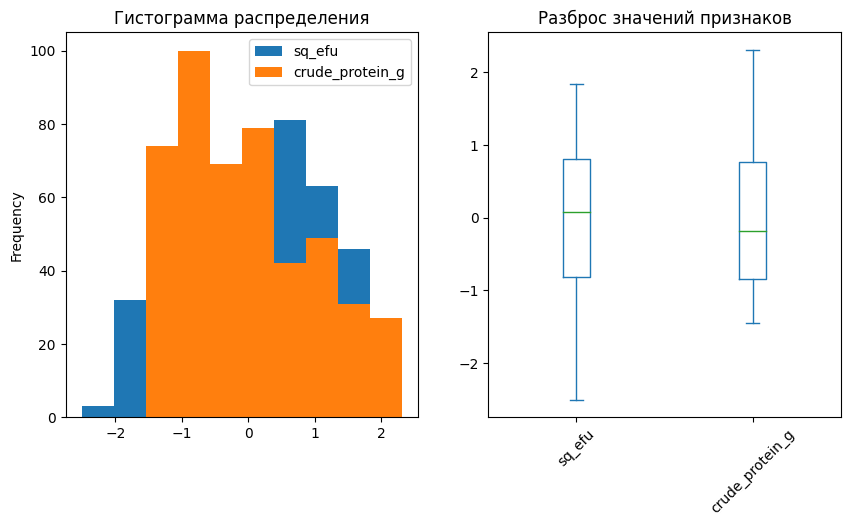

In [521]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [522]:
X_train[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

mean     std
sq_efu            0.0  1.0011
crude_protein_g  -0.0  1.0011

##### 5.2.2 Обучаем вторую модель

In [523]:
# инициализируйте модель линейной регрессии
model_lr_2  = LinearRegression()

# обучите модель на тренировочных данных
model_lr_2.fit(X_train, y_train)

# получите предсказания модели на тестовых данных 
# сохраните результат в переменную predictions
predictions_2 = model_lr_2.predict(X_test)

# посчитайте среднюю абсолютную ошибку на тестовых данных и выведите её на экран
mae_2 = mean_absolute_error(y_test, predictions_2)
print(f'MAE = {mae_2:.0f}')

MAE = 146


Считаем коэффициент детерминации R2

In [524]:

r2_2 = r2_score(y_test, predictions_2) 
r2_2


0.8247542745210407

Итого видим, что:
- средняя ошибка модели по модулю уменьшилась на 10 кг молока в год
- точность модели - выросла на 2%


Посчитаем остатки и проанализируем их

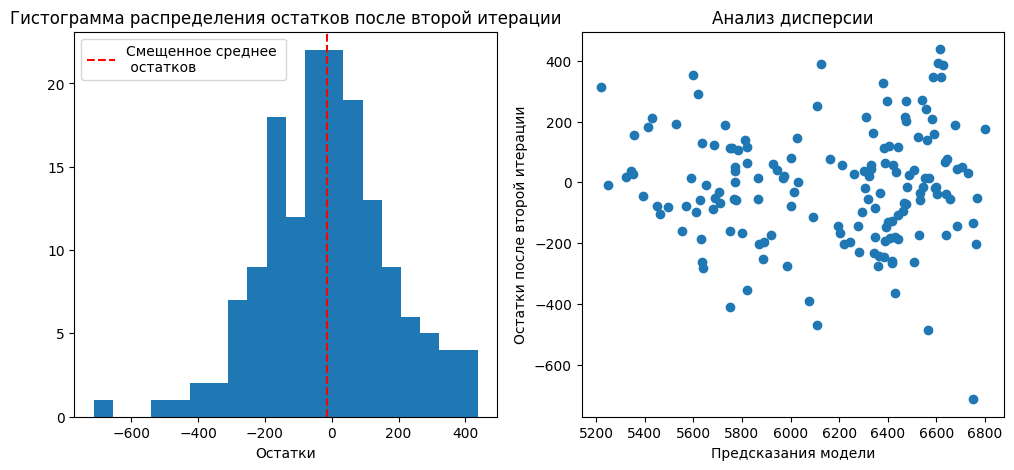

In [525]:
residuals_2 = y_test - predictions_2

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].hist(residuals_2, bins=20)
axes[0].axvline(residuals_2.mean(), color='r', linestyle='--', label='Смещенное среднее \n остатков')
axes[0].legend(loc='upper left')
axes[0].set_title('Гистограмма распределения остатков после второй итерации')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_2, residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки после второй итерации')
axes[1].set_title('Анализ дисперсии')
plt.show()

Вывод: точность модели немного выросла, но пока незначительно:
- выиграли 2% 
- уменьшили среднюю ошибку по модулю
- остатки пока аналогичны первой модели

#### 5.3 Третья модель (исключим признак Имя быка)

##### 5.3.1 Сначала исключим из данных признак с именем быка

In [526]:
X_new.head()

crude_protein_g  cow_is_sovering  pasture_is_hill  bull_is_sovering  \
0             1743                0                0                 0   
1             2138                0                0                 1   
2             1854                1                1                 1   
3             2012                1                1                 0   
4             1675                0                0                 1   

   is_old bull_name  spr_is_less_091  sq_efu  
0       1    Буйный                1  201.64  
1       0  Соловчик                1  163.84  
2       1     Барин                1  196.00  
3       1    Буйный                1  153.76  
4       0     Барин                1  163.84

In [527]:
X_witout_bull_name = X_new.drop('bull_name', axis=1)

In [528]:
X_witout_bull_name.head()

crude_protein_g  cow_is_sovering  pasture_is_hill  bull_is_sovering  \
0             1743                0                0                 0   
1             2138                0                0                 1   
2             1854                1                1                 1   
3             2012                1                1                 0   
4             1675                0                0                 1   

   is_old  spr_is_less_091  sq_efu  
0       1                1  201.64  
1       0                1  163.84  
2       1                1  196.00  
3       1                1  153.76  
4       0                1  163.84


##### 5.3.2 Снова подготавливаем данные для модели

In [529]:

# разбиваем данные на тренировочную и тестовую выборки

RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_witout_bull_name, 
    y, 
    random_state=RANDOM_STATE
)

### кодировать категориальный признаки не нужно - давно сделано



### кодируем количественные признаки

num_col_names = ['sq_efu', 'crude_protein_g']

# создайте переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем масштабированные данные с именами столбцов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)


### оставляем данные без кодирования

X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_scaled], axis=1)



In [531]:
X_witout_bull_name.columns

Index(['crude_protein_g', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'is_old', 'spr_is_less_091', 'sq_efu'],
      dtype='object')

In [532]:
X_train.head()

cow_is_sovering  pasture_is_hill  bull_is_sovering  is_old  \
0                1                1                 1       1   
1                1                1                 1       0   
2                0                0                 0       1   
3                0                1                 0       1   
4                0                0                 0       1   

   spr_is_less_091    sq_efu  crude_protein_g  
0                0  1.577968         1.079523  
1                1 -1.511438        -0.196920  
2                1  0.082269        -1.386085  
3                0 -0.150235         0.752230  
4                1 -1.102358         0.828598

In [533]:
X_test.head()

cow_is_sovering  pasture_is_hill  bull_is_sovering  is_old  \
0                0                1                 0       1   
1                1                1                 1       1   
2                1                1                 1       0   
3                0                0                 1       1   
4                0                1                 1       1   

   spr_is_less_091    sq_efu  crude_protein_g  
0                1 -0.527089        -0.813322  
1                0  1.490346         0.026730  
2                1 -0.527089        -0.682405  
3                1 -0.961737        -1.058792  
4                1  0.561660        -1.413360

In [534]:
X_train.shape

(471, 7)

In [535]:
X_test.shape

(157, 7)

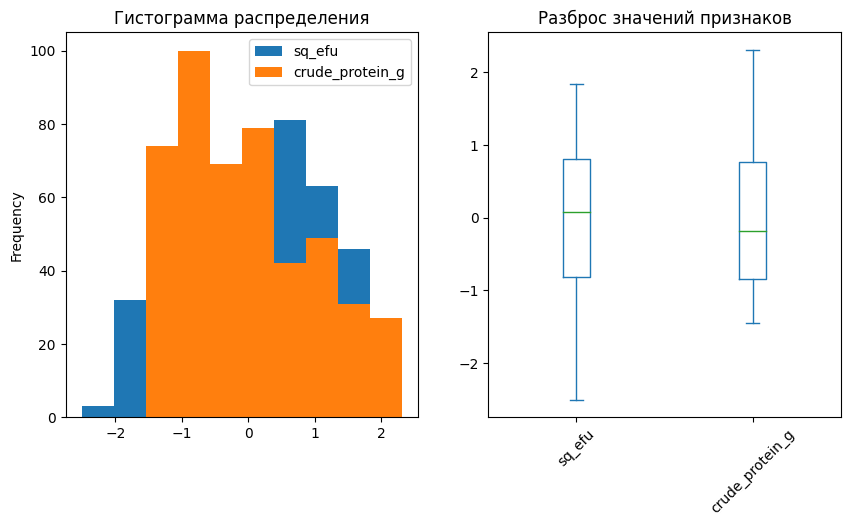

In [536]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()


In [537]:
X_train[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

mean     std
sq_efu            0.0  1.0011
crude_protein_g  -0.0  1.0011

##### 5.3.3 Обучаем третью модель

In [538]:

# инициализируйте модель линейной регрессии
model_lr_3  = LinearRegression()

# обучите модель на тренировочных данных
model_lr_3.fit(X_train, y_train)

# получите предсказания модели на тестовых данных 
# сохраните результат в переменную predictions
predictions_3 = model_lr_3.predict(X_test)

# посчитайте среднюю абсолютную ошибку на тестовых данных и выведите её на экран
mae_3 = mean_absolute_error(y_test, predictions_3)
print(f'MAE = {mae_3:.0f}')


MAE = 149


Считаем коэффициент детерминации R2

In [539]:
r2_3 = r2_score(y_test, predictions_3) 
r2_3

0.8180879926867503

Итого видим, что:
- средняя ошибка модели по модулю немного выросла -  на 3 кг молока в год
- точность модели - немного упала (меньше 1 процента)

#### 5.4 Сведем метрики трех моделей в одну таблицу

In [540]:
X.head()

energy_feed_unity  crude_protein_g  sugar_protein_ratio  cow_is_sovering  \
0               14.2             1743                0.890                0   
1               12.8             2138                0.890                0   
2               14.0             1854                0.885                1   
3               12.4             2012                0.885                1   
4               12.8             1675                0.885                0   

   pasture_is_hill  bull_is_sovering  is_old bull_name  
0                0                 0       1    Буйный  
1                0                 1       0  Соловчик  
2                1                 1       1     Барин  
3                1                 0       1    Буйный  
4                0                 1       0     Барин

In [557]:
X_first = X.copy(deep=True)

In [541]:
X_new.head()

crude_protein_g  cow_is_sovering  pasture_is_hill  bull_is_sovering  \
0             1743                0                0                 0   
1             2138                0                0                 1   
2             1854                1                1                 1   
3             2012                1                1                 0   
4             1675                0                0                 1   

   is_old bull_name  spr_is_less_091  sq_efu  
0       1    Буйный                1  201.64  
1       0  Соловчик                1  163.84  
2       1     Барин                1  196.00  
3       1    Буйный                1  153.76  
4       0     Барин                1  163.84

In [542]:
X_witout_bull_name.head()

crude_protein_g  cow_is_sovering  pasture_is_hill  bull_is_sovering  \
0             1743                0                0                 0   
1             2138                0                0                 1   
2             1854                1                1                 1   
3             2012                1                1                 0   
4             1675                0                0                 1   

   is_old  spr_is_less_091  sq_efu  
0       1                1  201.64  
1       0                1  163.84  
2       1                1  196.00  
3       1                1  153.76  
4       0                1  163.84

Заведем функцию расчета метрик для разных входных данных: 
- X_first (самые первые данные), 
- X_new (после приведения СПО в бинарный вид и ЭКЕ в квадрате), 
- X_without_bull_name (после исключения имени быка)

In [573]:
def metrics_calculation(some_X):

    RANDOM_STATE=42

    X_train, X_test, y_train, y_test = train_test_split(
        some_X, 
        y, 
        random_state=RANDOM_STATE)

    # задаем условие выбора столбцов для масштабирования
    if list(some_X.columns) == list(X_first.columns):
        num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio']

        #кодируем имя быка
        encoder = OneHotEncoder(sparse=False, drop='first')
        X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
        X_test_ohe = encoder.transform(X_test[['bull_name']])
        encoder_col_names = encoder.get_feature_names_out()
        X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
        X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

        #добавляем столбцы без кодировки
        X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)
        X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)

    elif list(some_X.columns) == list(X_new.columns):
        num_col_names = ['sq_efu', 'crude_protein_g']

        #кодируем имя быка
        encoder = OneHotEncoder(sparse=False, drop='first')
        X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
        X_test_ohe = encoder.transform(X_test[['bull_name']])
        encoder_col_names = encoder.get_feature_names_out()
        X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
        X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


        # добавляем столбцы без кодировки
        X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)
        X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

    
    elif list(some_X.columns) == list(X_witout_bull_name.columns):
        num_col_names = ['sq_efu', 'crude_protein_g']

        X_train_ohe, X_test_ohe = [], []

        # добавляем столбцы без кодировки
        X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)
        X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

        

    # масштабируем количественные признаки
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



    ### сшиваем данные вместе

    if len(X_train_ohe) !=0:
        X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
        X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)
    
    else:
        X_train = pd.concat([X_train_non_encoded, X_train_scaled], axis=1)
        X_test = pd.concat([X_test_non_encoded, X_test_scaled], axis=1)

    ### переименовываем столбцы
    X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                        ('bull_name_Геркулес',): 'bname_is_herc',
                        ('bull_name_Соловчик',): 'bname_is_sol'},
                        inplace=True)

    X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                        'bull_name_Геркулес': 'bname_is_herc',
                        'bull_name_Соловчик': 'bname_is_sol'},
                        inplace=True)

    # обучаем модель
    model_lr_func  = LinearRegression()
    model_lr_func.fit(X_train, y_train)
    func_predictions = model_lr_func.predict(X_test)

    mae_func = mean_absolute_error(y_test, func_predictions)
    mse_func= mean_squared_error(y_test, func_predictions)
    rmse_func= mean_squared_error(y_test, func_predictions, squared=False)
    r2_func= r2_score(y_test, func_predictions)

    return {'mae': mae_func,
            'mse': mse_func,
            'rmse':rmse_func,
            'R2': r2_func}


In [575]:
metrics_calculation(some_X= X_first)

{'mae': 155.676252309263,
 'mse': 40115.812841315725,
 'rmse': 200.28932283403358,
 'R2': 0.8029336092311704}

In [574]:
metrics_calculation(some_X= X_new)

{'mae': 146.16302445362317,
 'mse': 35673.88988618194,
 'rmse': 188.87532895055918,
 'R2': 0.8247542745210407}

In [576]:
metrics_calculation(some_X= X_witout_bull_name)

{'mae': 149.039652223646,
 'mse': 37030.91131113694,
 'rmse': 192.4341739690145,
 'R2': 0.8180879926867503}

Сводим метрики в единую таблицу

In [578]:

models_metrics_df = pd.DataFrame([metrics_calculation(some_X= X_first),
                                  metrics_calculation(some_X= X_new),
                                  metrics_calculation(some_X= X_witout_bull_name)], 
                                 
                                 index=['model_1', 'model_2', 'model_3'])

# Добавляем столбец с описанием
models_metrics_df['sub'] = ['До настройки', 'После настройки', 'После настройки без имени быка']

models_metrics_df.round({'mae':0, 'mse': 0, 'rmse':0, 'R2':3})



mae      mse   rmse     R2                             sub
model_1  156.0  40116.0  200.0  0.803                    До настройки
model_2  146.0  35674.0  189.0  0.825                 После настройки
model_3  149.0  37031.0  192.0  0.818  После настройки без имени быка